# Homework Assignment 5 - Solutions - [30 points]

<hr>


## <u>Case Study</u>: Young Adult Alcoholism Patterns Over Time in the U.S.

In this case study, we would like to learn more about how the prevalence of young adults with alcohol use disorders has changed over time in the 50 U.S. states. The **young_adult_alcoholism.csv** dataset contains the percent of adults age 18-25 in each state that have an alcohol use disorder in the years 2002, 2003,..., 2018 respectively.

In this analysis we would like to answer the following research questions.

### <u>Research Questions</u>:
1. Is there any evidence to suggest that that there are distinct groupings of states that exhibit young adult alcoholism rate patterns over this time range?
2. If so, how many of these groupings of states are there?
3. What patterns over time characterize these states?
4. What patterns over time charaterize the two most dissimilar groups of states?
5. What patterns over time characterize the two second most dissimilar groups of states.


### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

## 1. Data Processing

Read the **young_adult_alcoholism.csv** file into a dataframe and show the first 5 rows. You can assume that this dataset has no missing values.

In [2]:
df = pd.read_csv('young_adult_alcoholism.csv')

In [3]:
df.head()


State      2002      2003      2004      2005      2006      2007  \
0     Alabama  0.000136  0.000135  0.000126  0.000131  0.000130  0.000130   
1      Alaska  0.000191  0.000158  0.000163  0.000175  0.000175  0.000172   
2     Arizona  0.000194  0.000193  0.000177  0.000166  0.000156  0.000176   
3    Arkansas  0.000175  0.000160  0.000155  0.000179  0.000188  0.000163   
4  California  0.000148  0.000166  0.000167  0.000174  0.000170  0.000168   

       2008      2009      2010      2011      2012      2013      2014  \
0  0.000138  0.000138  0.000120  0.000115  0.000121  0.000106  0.000096   
1  0.000169  0.000159  0.000167  0.000161  0.000133  0.000132  0.000120   
2  0.000182  0.000170  0.000166  0.000142  0.000135  0.000131  0.000124   
3  0.000156  0.000142  0.000117  0.000120  0.000119  0.000103  0.000097   
4  0.000164  0.000159  0.000161  0.000155  0.000146  0.000130  0.000118   

       2015      2016      2017      2018  
0  0.000090  0.000080  0.000078  0.000091  
1  0.000100  0.000119  0.000123  0.000126  
2  0.000114  0.000112  0.000098  0.000089  
3  0.000097  0.000092  0.000092  0.000083  
4  0.000106  0.000099  0.000103  0.000105

## 2. Basic Descriptive Analytics

For each pair of years, plot a scatterplot. In general, how does the association between the state young adult alcoholism patterns compare for a.) years that are very close to each other vs. b.) years that are further away from each other?

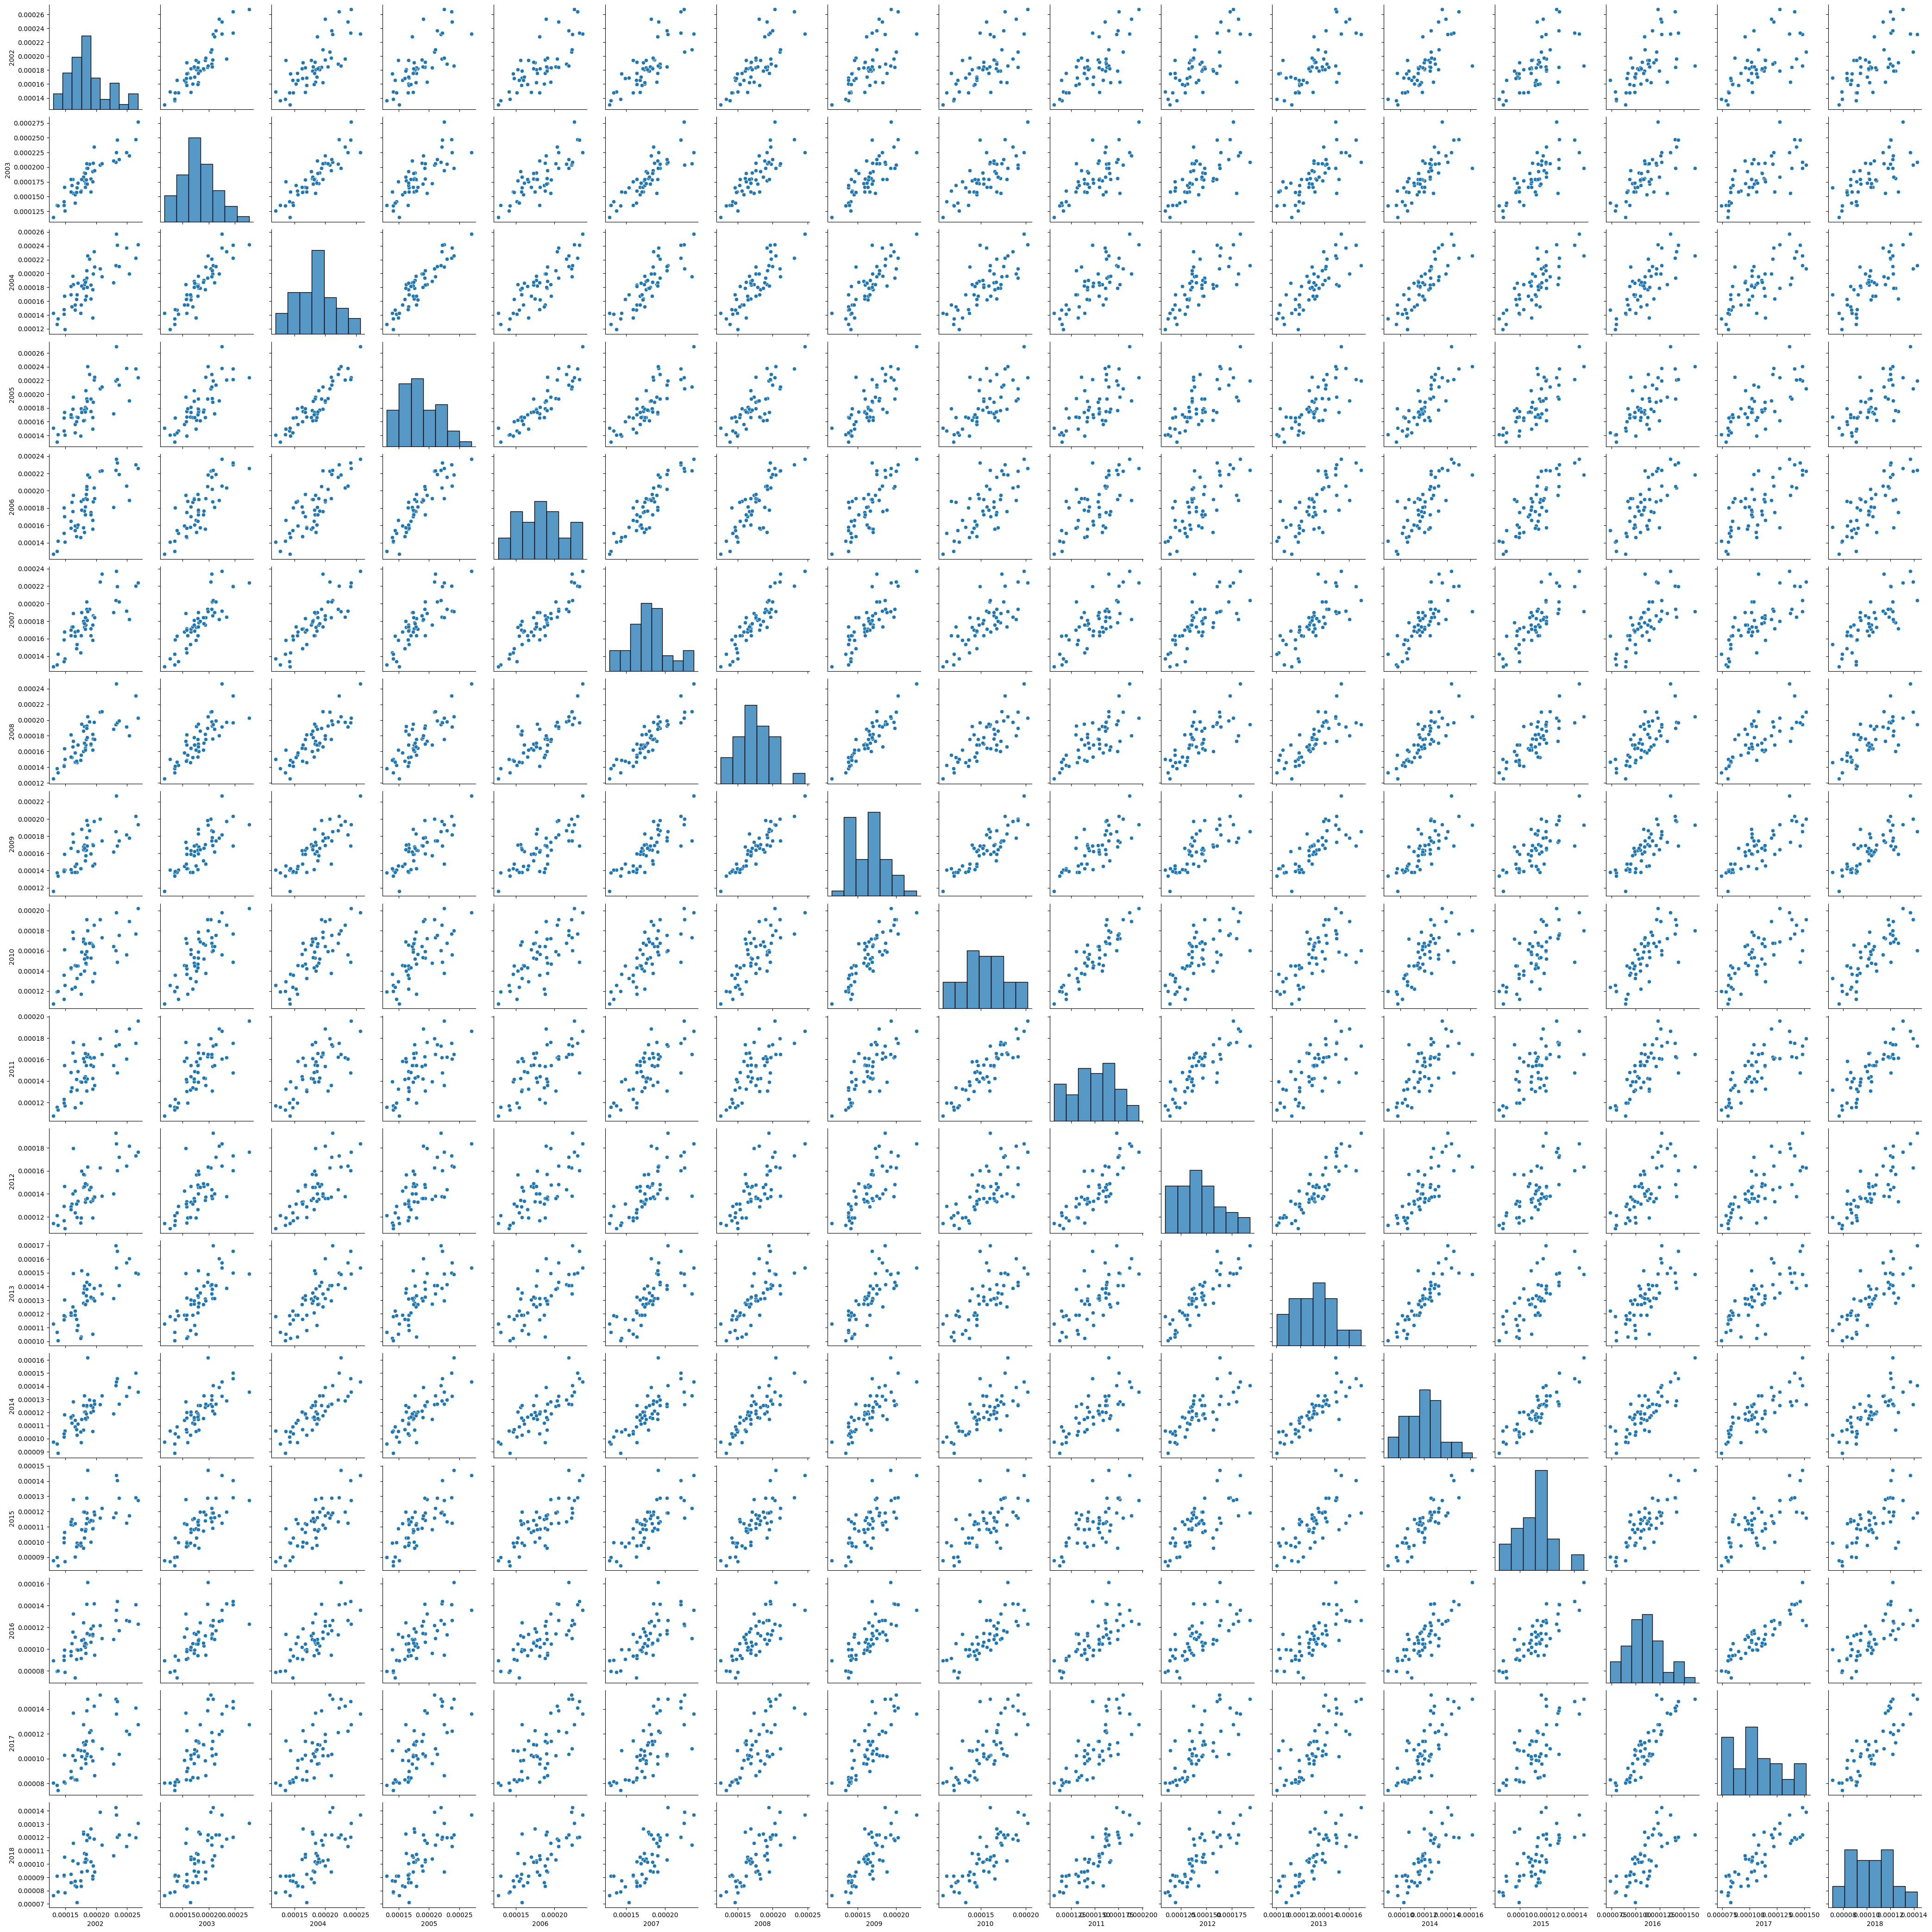

In [4]:
sns.pairplot(df)
plt.show()

For years that are very close to each other there is a stronger association. This association is also still observed between years that are far to each other but the data points look more sparsed which could impact the correlation between years.

## 3. Clusterability


### 3.1.  t-SNE Plots

Using 6 different perplexity values and at least two random states for each perplexity value, map the numerical variables in this dataset onto a two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

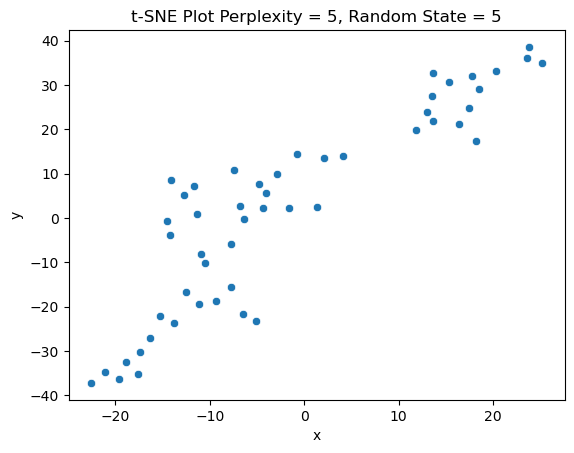

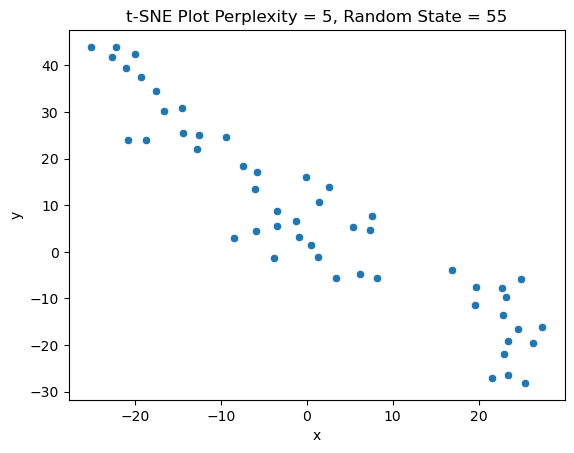

\../\../\../


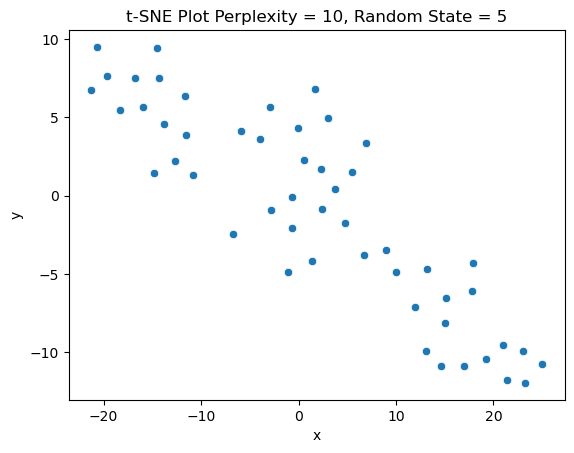

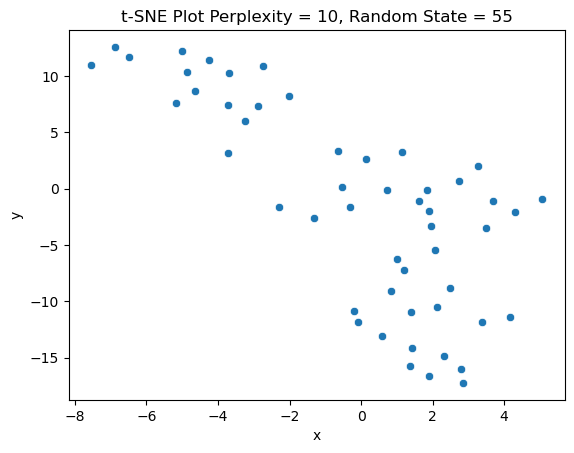

\../\../\../


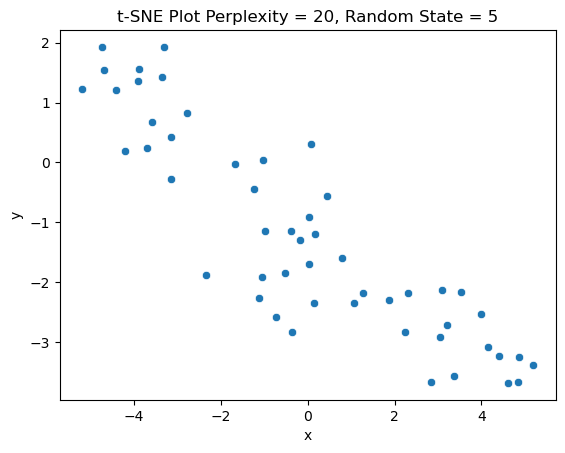

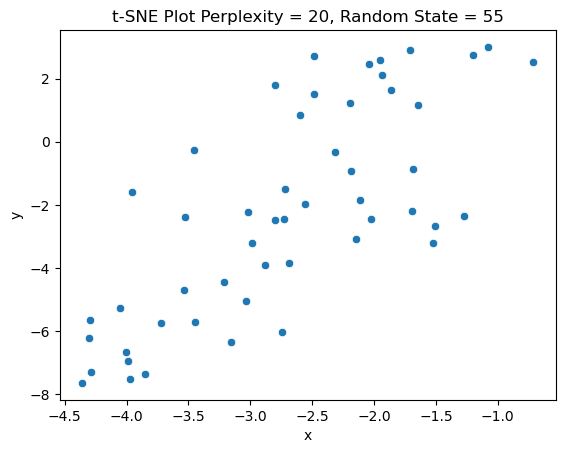

\../\../\../


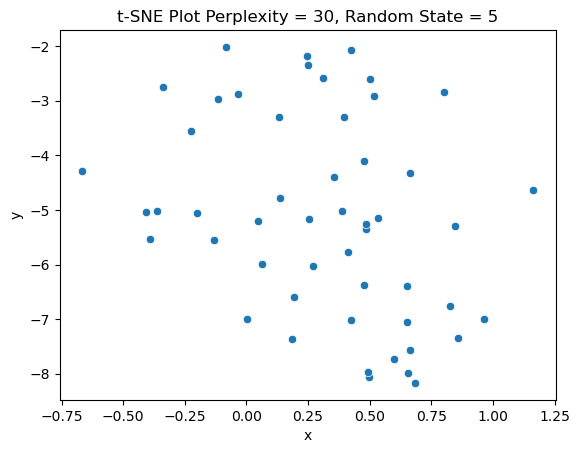

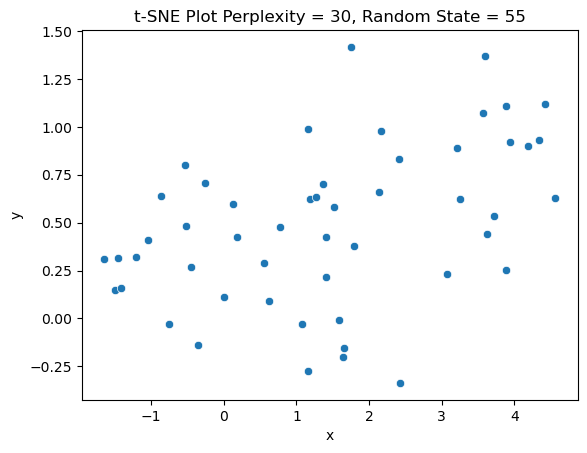

\../\../\../


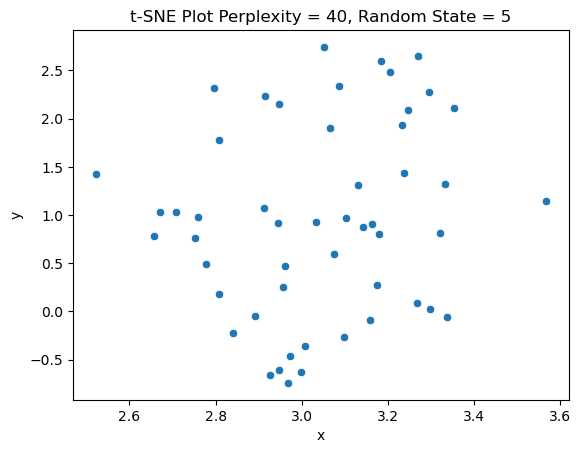

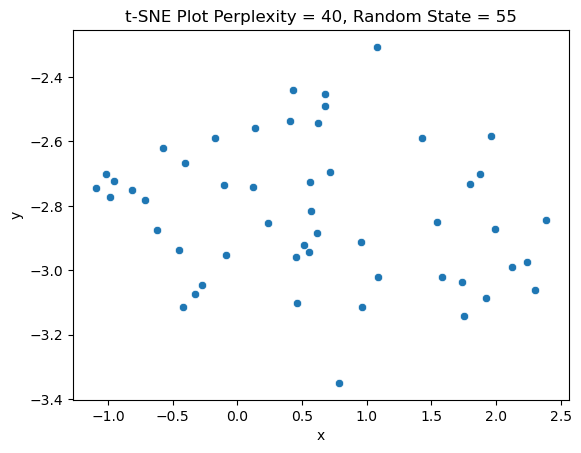

\../\../\../


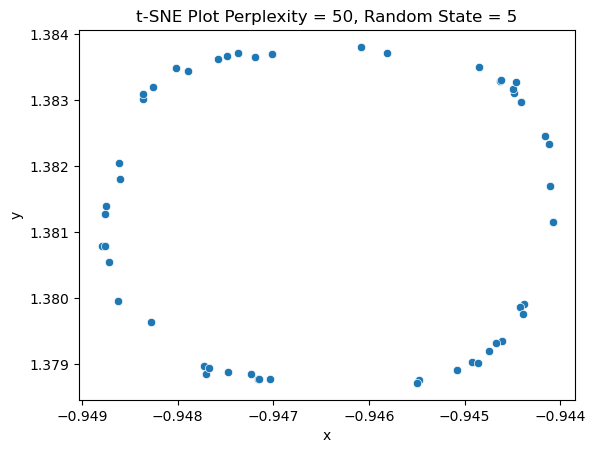

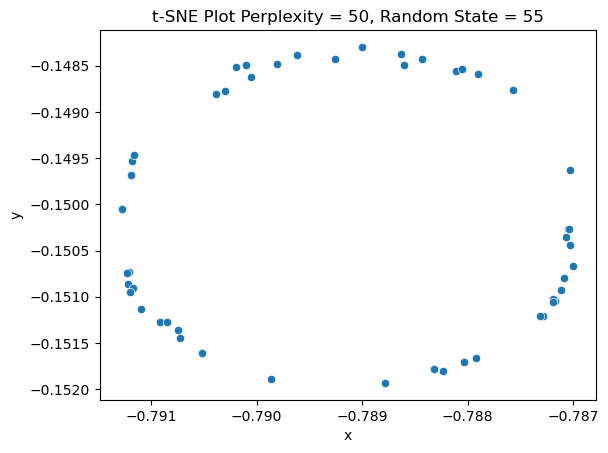

\../\../\../


In [5]:
df2 = df.drop(['State'], axis = 1)

for perp in [5,10, 20, 30, 40, 50]:
    for rs in [5,55]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(df2)
        df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x',y='y', data=df_combo)
        plt.title('t-SNE Plot Perplexity = %s, Random State = %s' %(perp, rs))
        plt.show()
    print('\../\../\../')

### 3.2.  Use your t-SNE plots to answer the following questions.

* <u>3.2.1.</u> Do these plots suggest that the dataset is clusterable? Explain.

Yes, at low perplexity values from 5 to 20 it is possible to observe a cluster like structure in the data. Different groups are observed and there is some distance between them which could suggest a clustering structure


* <u>3.2.2.</u> How many clusters are in the dataset? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).


2 main clusters. If we observe the plots at perplexity values 5, 10, 20 it is possible to observe two main clusters in both seed.states. One cluster is bigger than the other one therefore the distribution of datapoints is not even.

### 3.3. Selecting a t-SNE plot

Of the plots that you created above, pick a perplexity value and random state that best reflects what you suggested in your answers to the questions in 3.2 and show the corresponding t-SNE plot below. **In addition, overlay the 'state' labels for each of these points.**

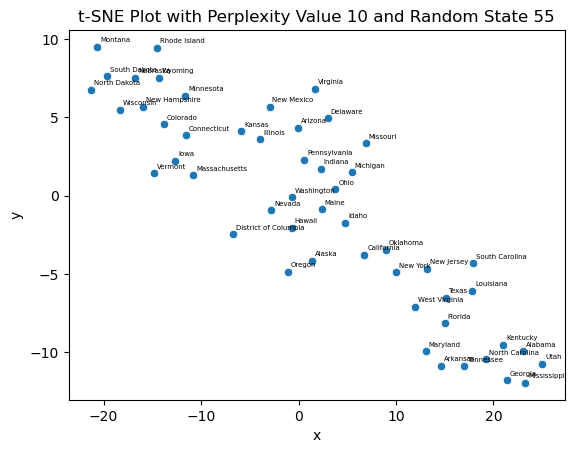

In [6]:
tsne = TSNE(n_components=2, perplexity=10, random_state=5)
data_tsne = tsne.fit_transform(df2)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
df_combo = pd.concat([df, df_tsne], axis=1)
sns.scatterplot(x='x',y='y', data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(10, 55))

for i in range(df.shape[0]):
    plt.text(x = df_combo.x[i] + 0.3, y = df_combo.y[i] + 0.3, s = df_combo.State[i],
            fontdict = dict(color = 'black', size = 5))
plt.show()

In [7]:
tsne_data = df_combo.copy()
tsne_data.shape

(51, 20)

## 4. Clustering Algorithm Selection

To learn about which clusters are most dissimilar to each other in our clusterings, let's use a hierarchical agglomerative clustering algorithm. Let's first consult the average silhouette score to help us decide which linkage function to use.

### 4.1.  Average Silhouette Score Plots

Create 4 average silhouette score plots with this dataset, one for each of the following clustering algorithms:
* Hierarchical agglomerative clustering with single linkage
* Hierarchical agglomerative clustering with average linkage
* Hierarchical agglomerative clustering with complete linkage
* Hierarchical agglomerative clustering with Ward's linkage

Each of your average silhouette score plots should plot the average silhouette score for clusterings created with this algorithm with k=2, k=3, ..., k=7 clusters, respectively.

single


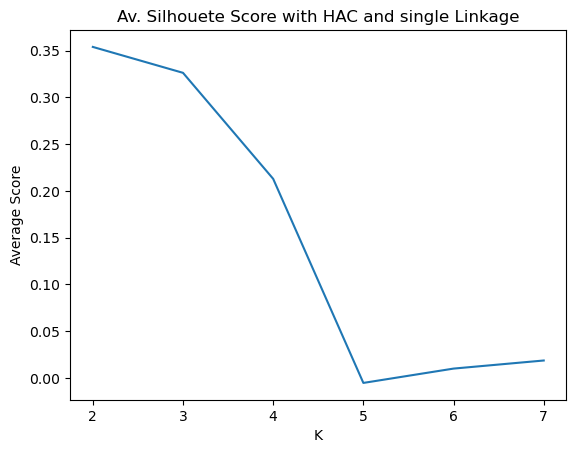

complete


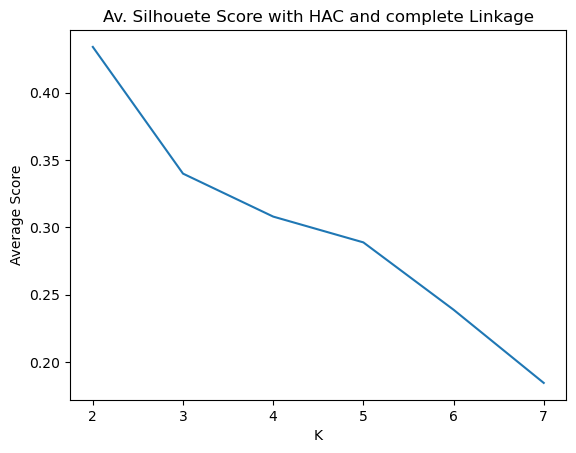

ward


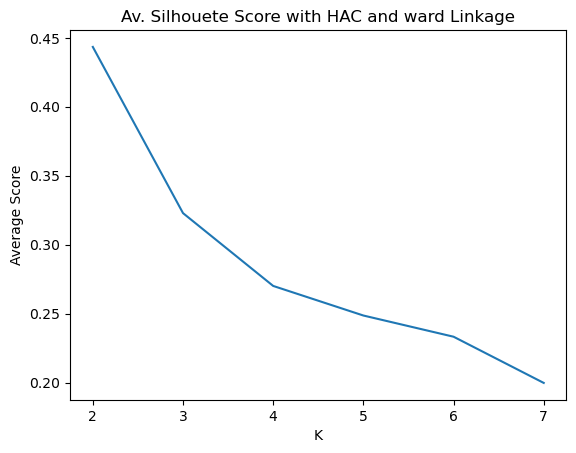

average


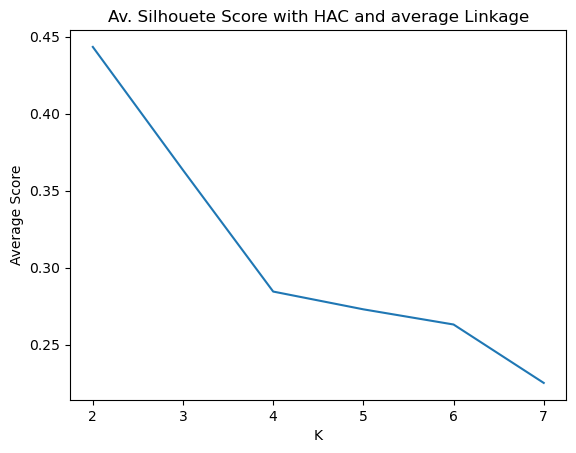

In [8]:
for k in ['single', 'complete', 'ward', 'average']:
    avg_ss = []
    for pp in range(2,8):
        hac = AgglomerativeClustering(n_clusters = pp, metric = 'euclidean', linkage = k)
        y_pred = hac.fit_predict(df2)
        avg_ss.append(silhouette_score(df2, y_pred))
    
    print(k)
    plt.plot(range(2,8), avg_ss)
    plt.title('Av. Silhouete Score with HAC and %s Linkage' %k)
    plt.xlabel('K')
    plt.ylabel('Average Score')
    plt.show()
    
    

### 4.2. Which clustering algorithm and k?

Which hierarchical agglomerative clustering algorithm and cluster number are the plots above suggesting will yield the best cohesion and separation?

Either Average or Ward linkage method shows the best cohesion and separation throughout all the different clusters compared to the other linkage methods. The total number of clusters suggested by the plot is 2. 

## 5. Hierarchical Agglomerative Clustering with Single Linkage

Let's try out hierarchical agglomerative clustering with single linkage.

### 5.1.  Dendrogram

Create a dendrogram using hierarchical agglomerative clustering with single linkage for the dataset. 
* Label the points with the 'State' column.
* Make sure you are able to read the state labels in your dendrogram.

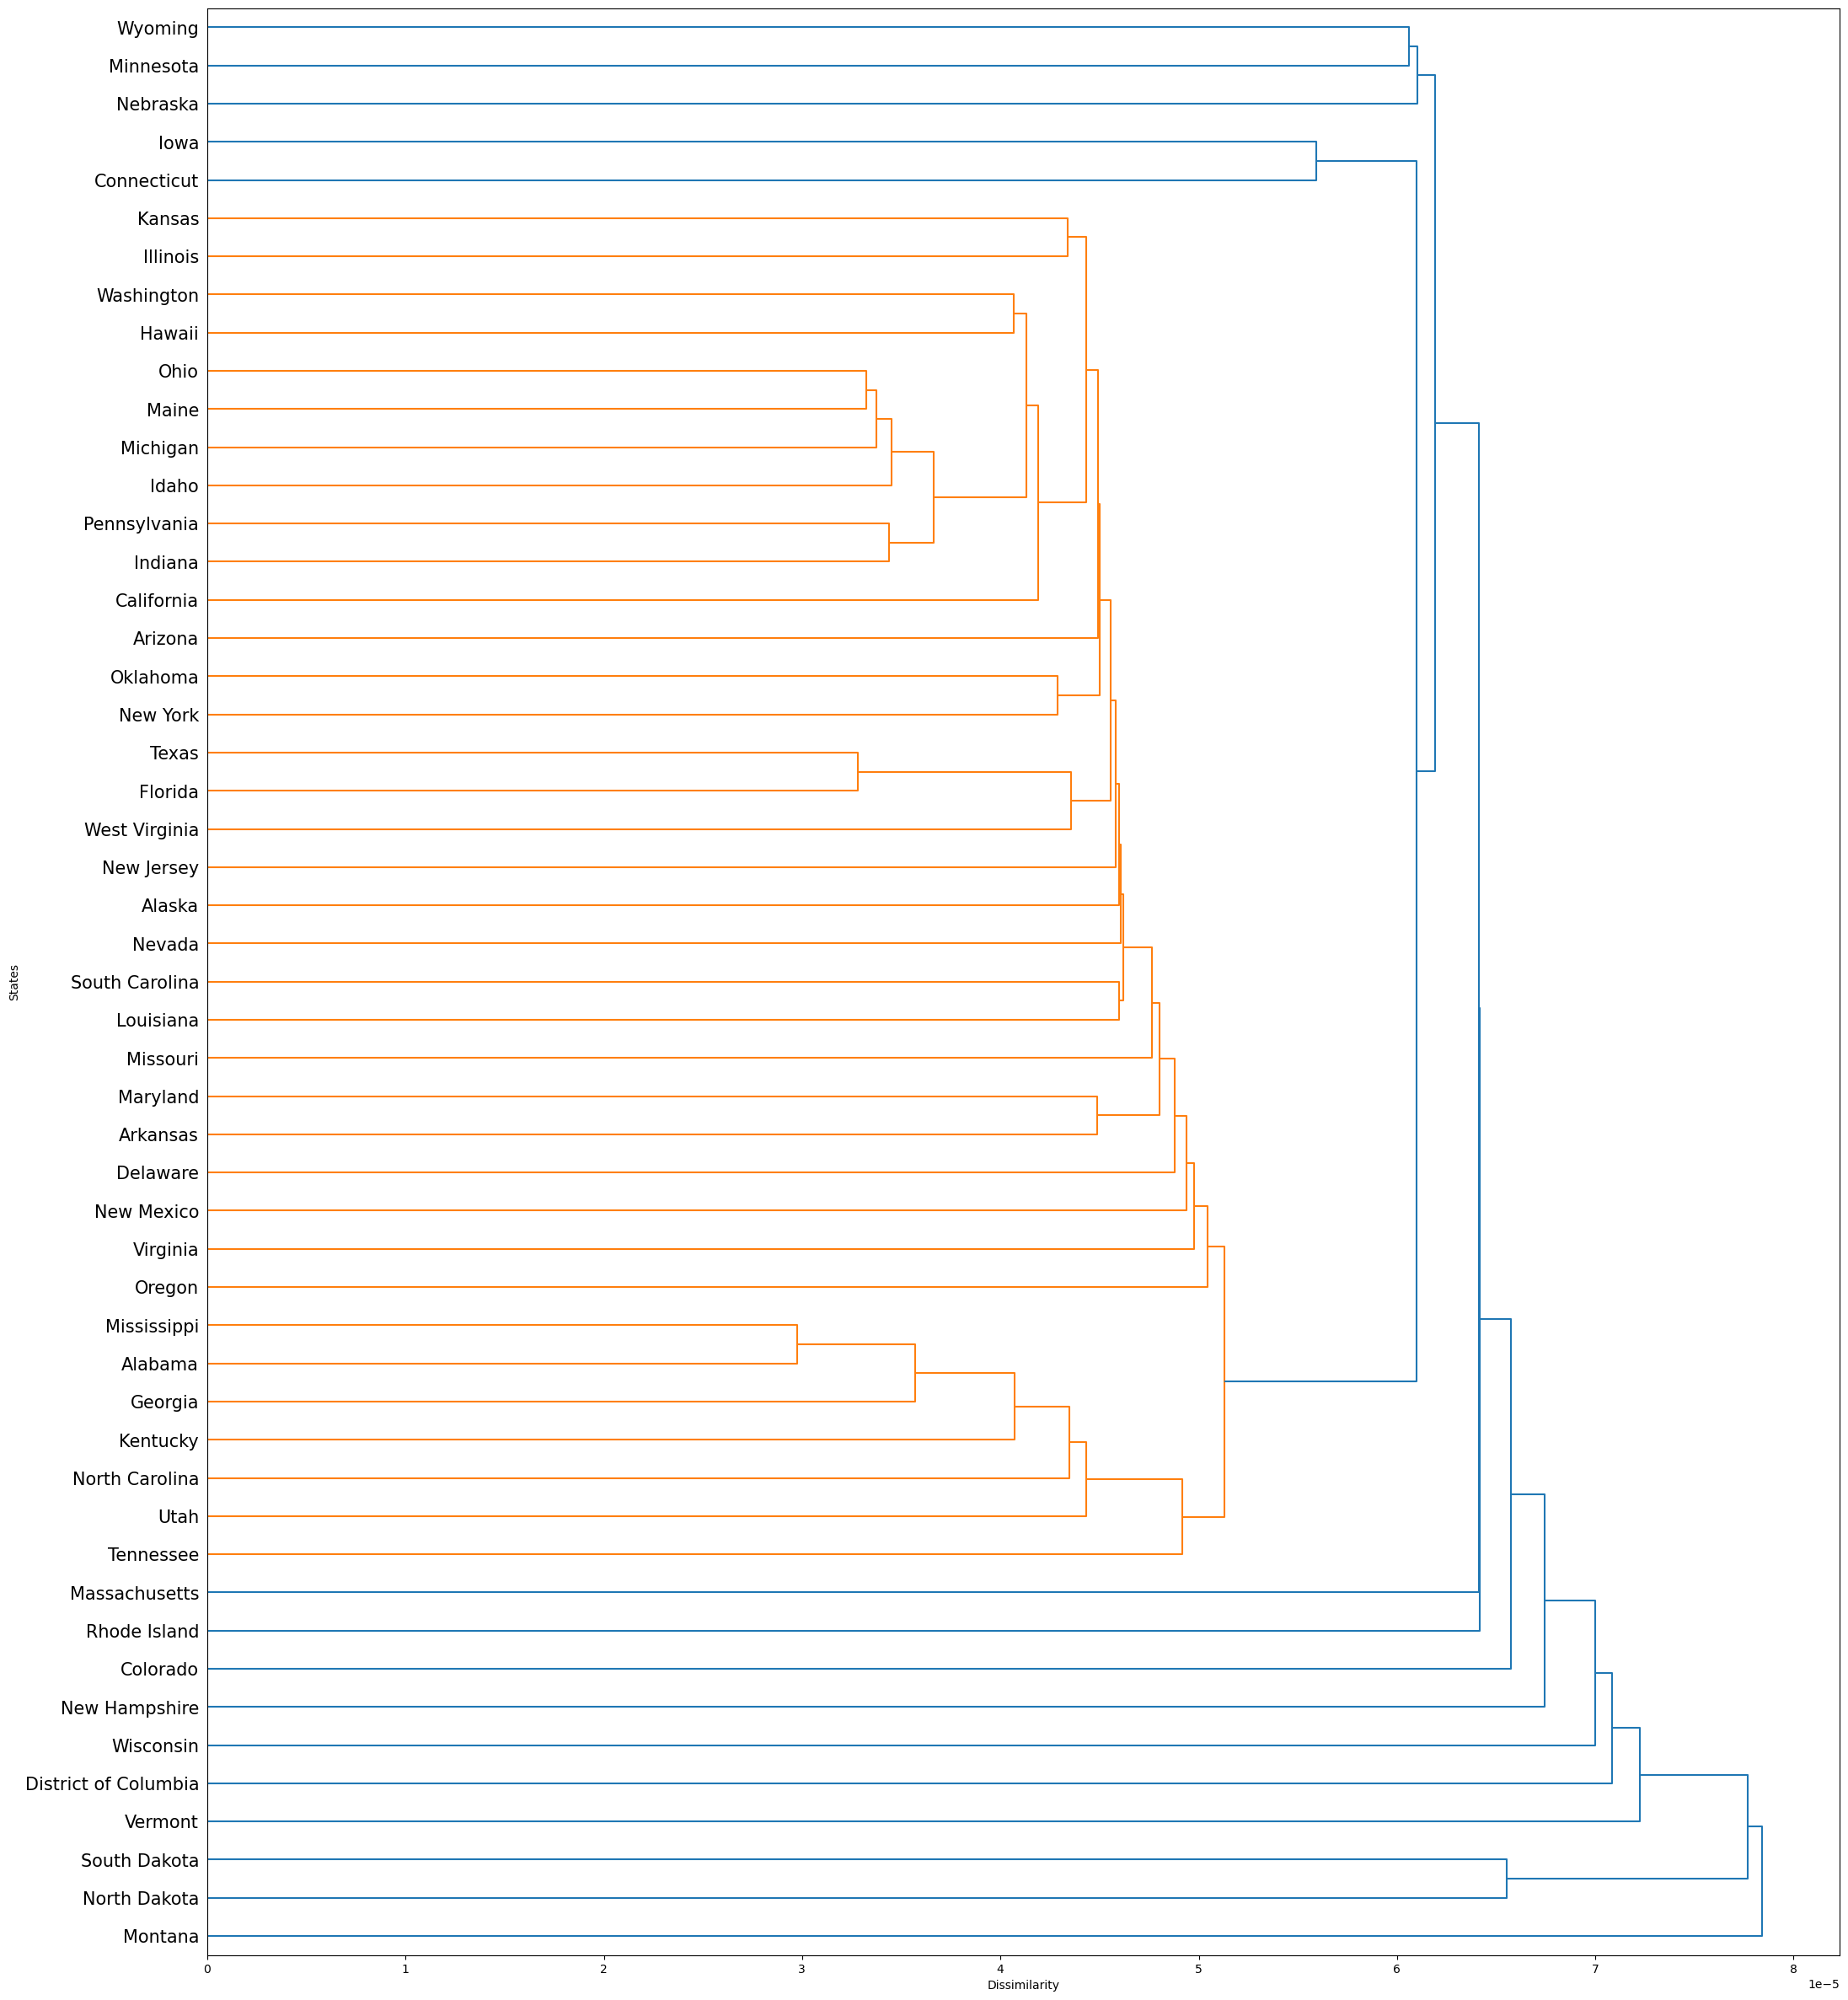

In [9]:
mat = pdist(df2, metric = 'euclidean')
link = linkage(mat, method = 'single')

fig, ax = plt.subplots(figsize = (25,30))
d = dendrogram(link, orientation = 'right', labels = df['State'].array, ax = ax)
ax.set_xlabel('Dissimilarity')
ax.set_ylabel('States')
plt.yticks(fontsize = 15)
plt.show()

### 5.2. t-SNE Individual Clustering Visualization

Then for each of the clusterings with k=2,k=3,...,k=7 clusters, color code the points in your selected t-SNE plot with the respective cluster labels.

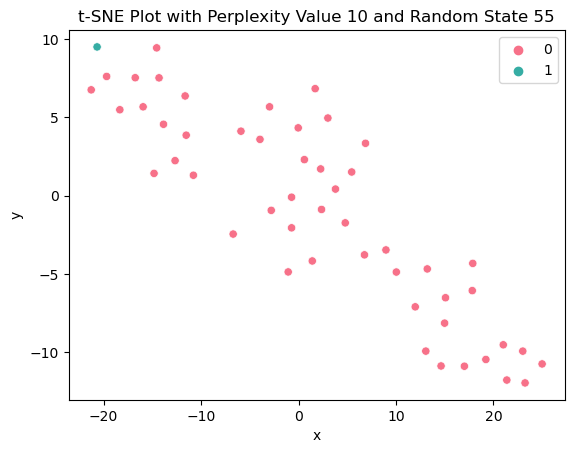

\.\


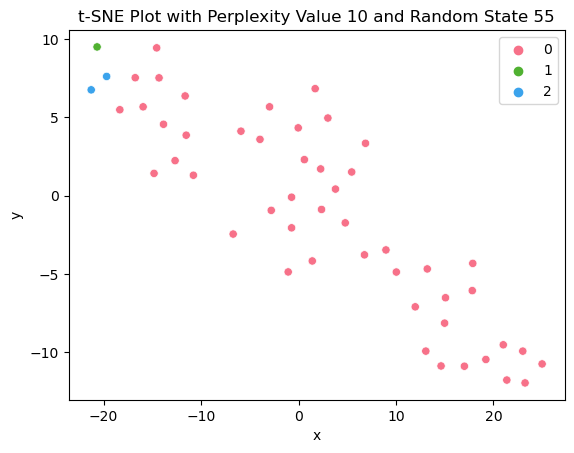

\.\


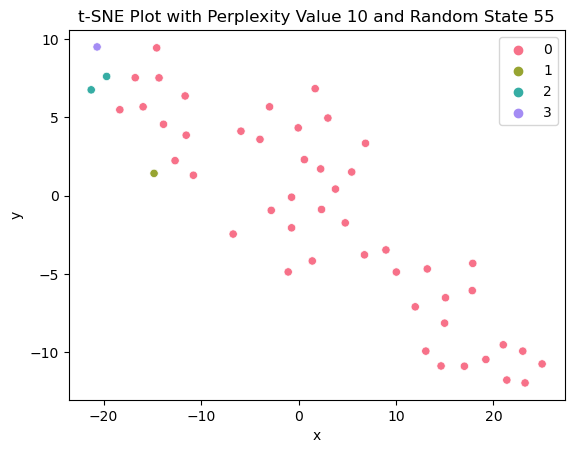

\.\


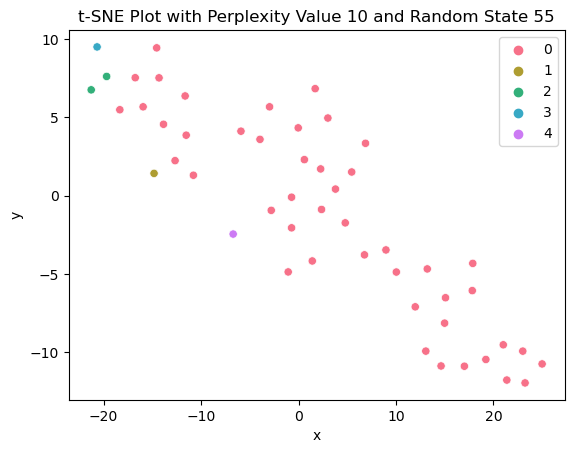

\.\


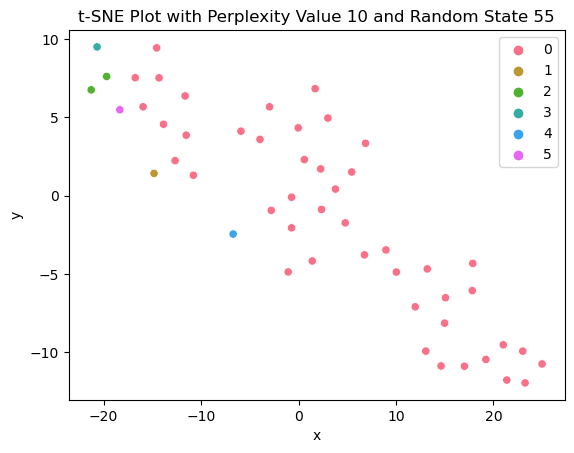

\.\


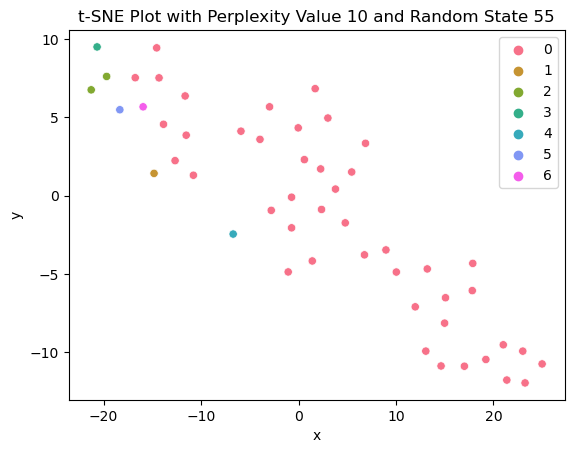

\.\


In [10]:
for k in range(2,8):
    hac = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage = 'single')
    tsne_data['predicted_cluster'] = hac.fit_predict(df2)
    
    sns.scatterplot(x='x',y='y', hue = 'predicted_cluster',palette=sns.color_palette("husl", k), data=tsne_data)
    plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(10, 55))
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()
    
    print('\\.\\')
  
    

## 6. Hierarchical Agglomerative Clustering with Complete Linkage

Let's try out hierarchical agglomerative clustering with complete linkage.

### 6.1.  Dendrogram

Create a dendrogram using hierarchical agglomerative clustering with complete linkage for the dataset. 
* Label the points with the 'State' column.
* Make sure you are able to read the state labels in your dendrogram.

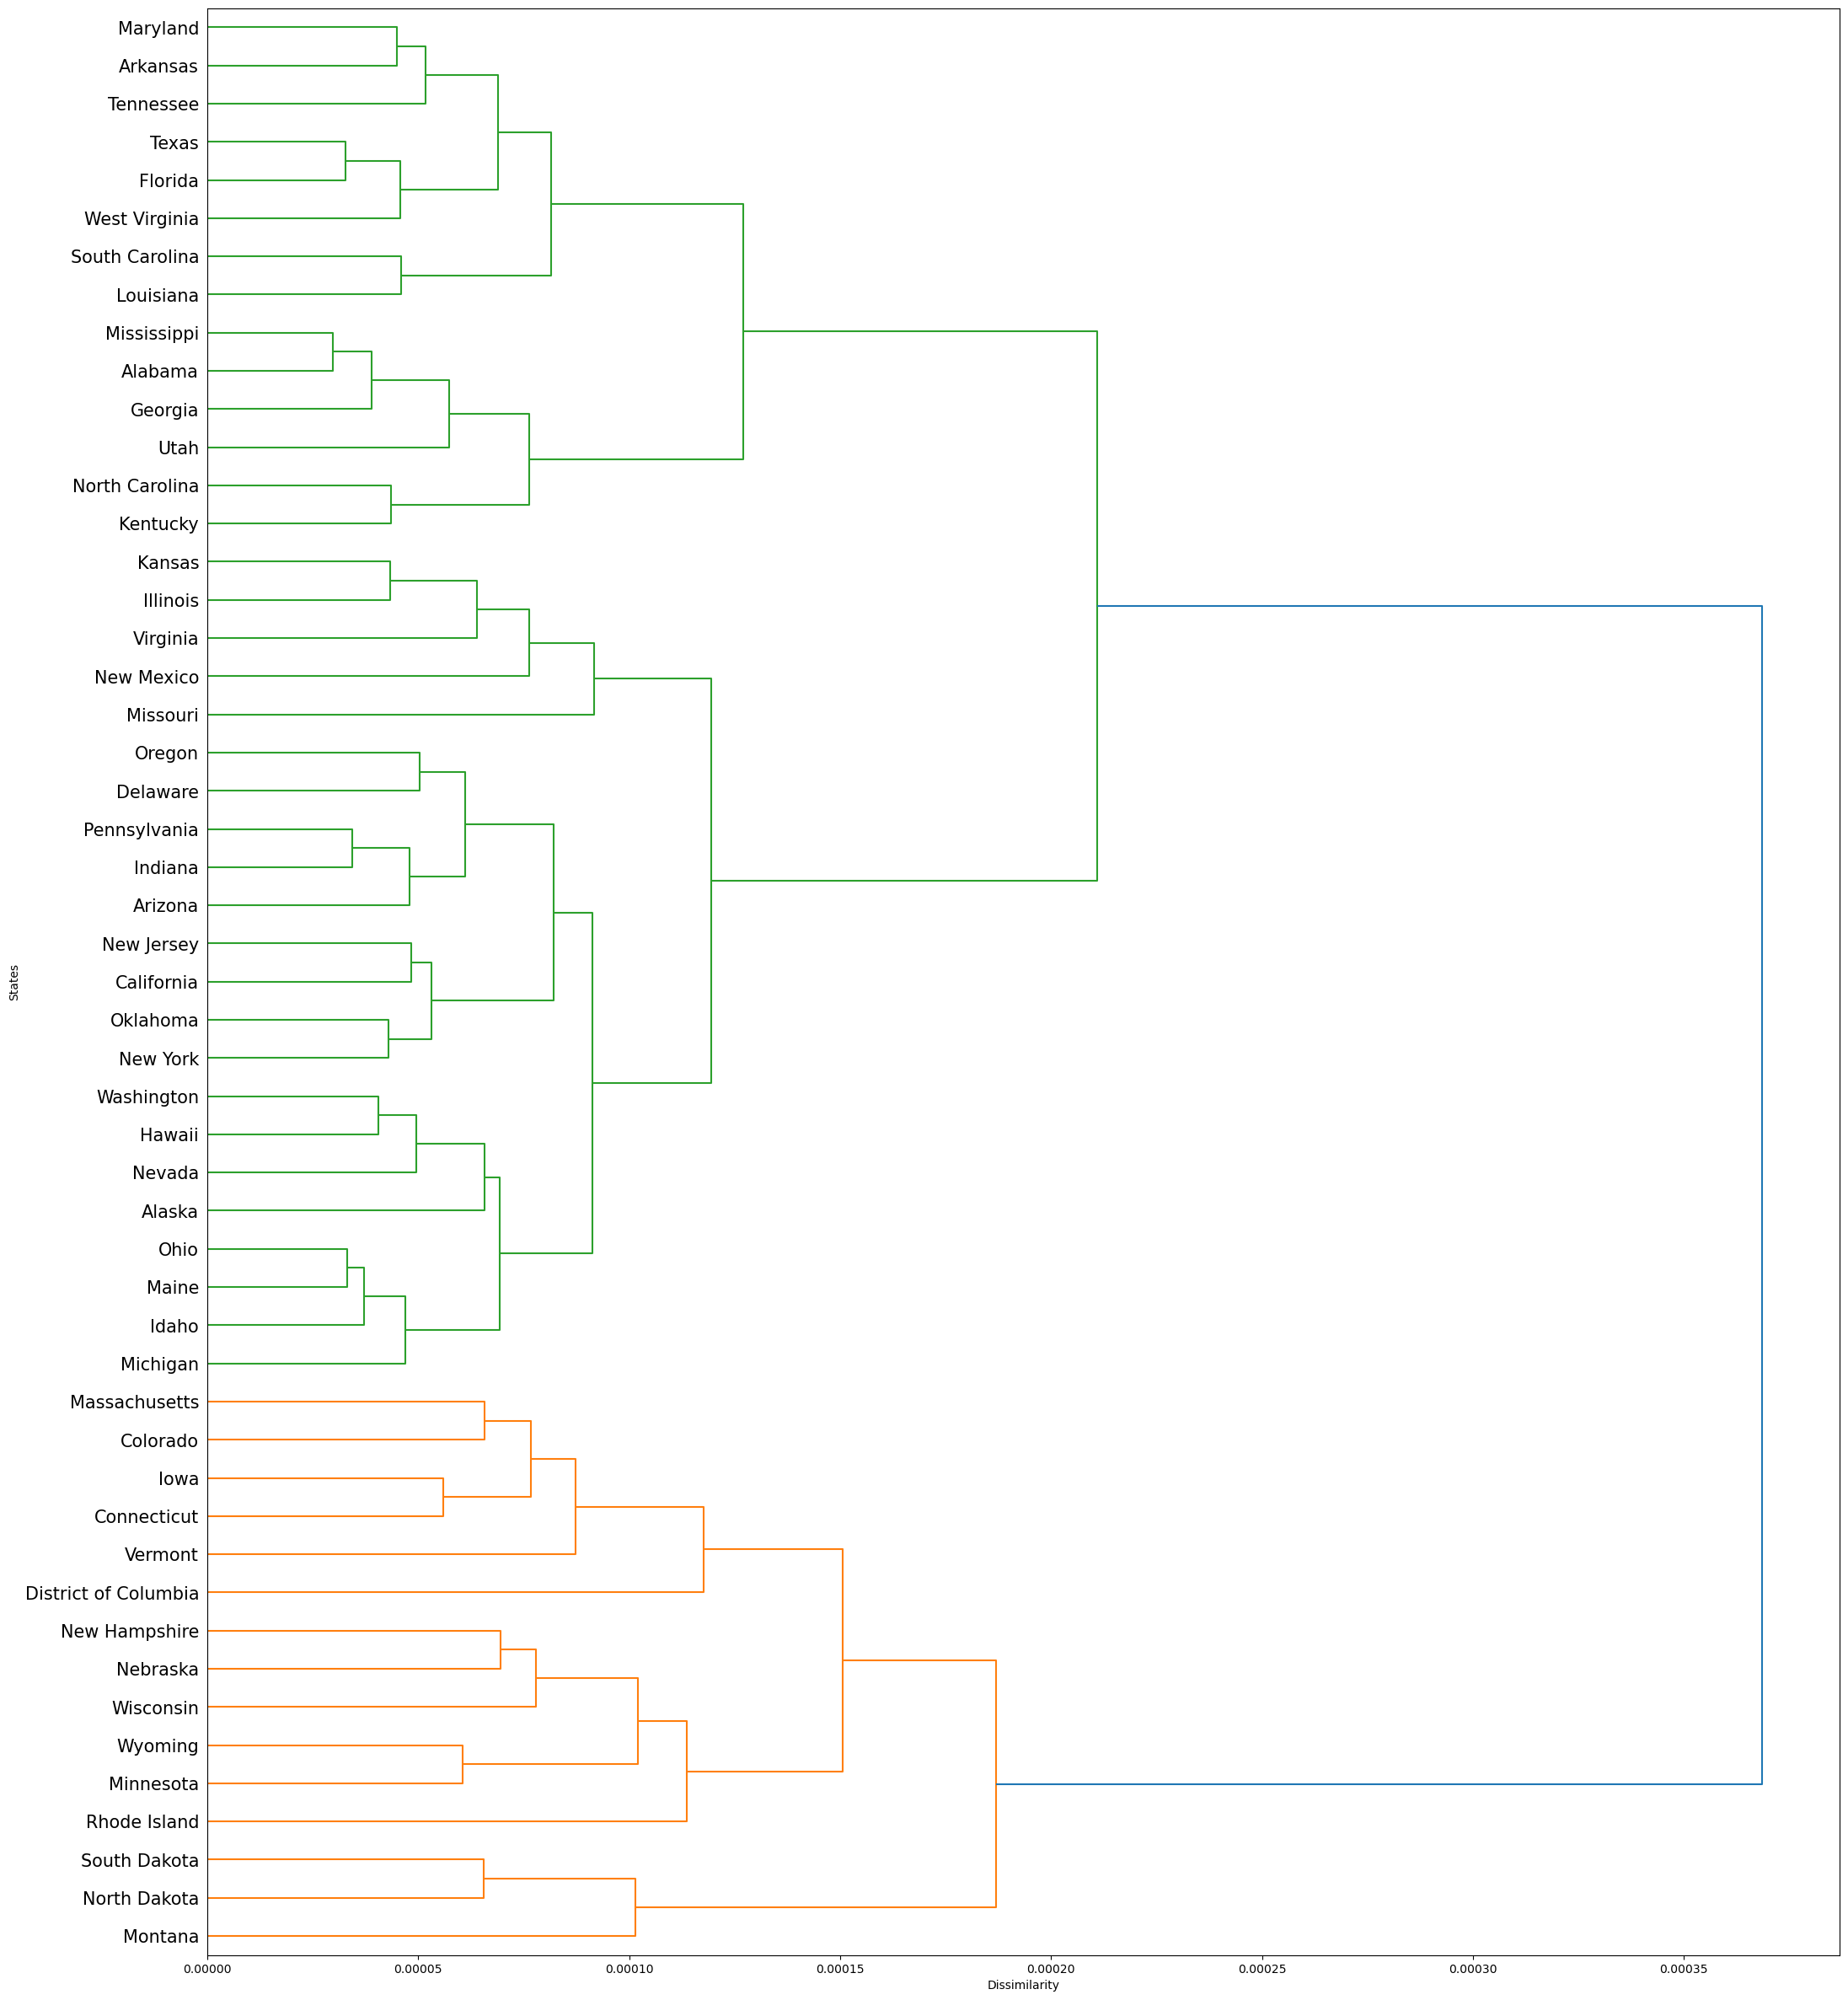

In [11]:
mat = pdist(df2, metric = 'euclidean')
link = linkage(mat, method = 'complete')

fig, ax = plt.subplots(figsize = (25,30))
d = dendrogram(link, orientation = 'right', labels = df['State'].array, ax = ax)
ax.set_xlabel('Dissimilarity')
ax.set_ylabel('States')
plt.yticks(fontsize = 15)
plt.show()

### 6.2. t-SNE Individual Clustering Visualization

Then for each of the clusterings with k=2,k=3,...,k=7 clusters, color code the points in your selected t-SNE plot with the respective cluster labels.

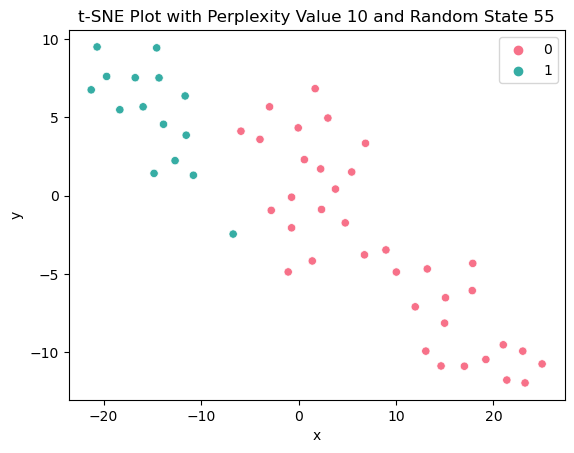

\.\


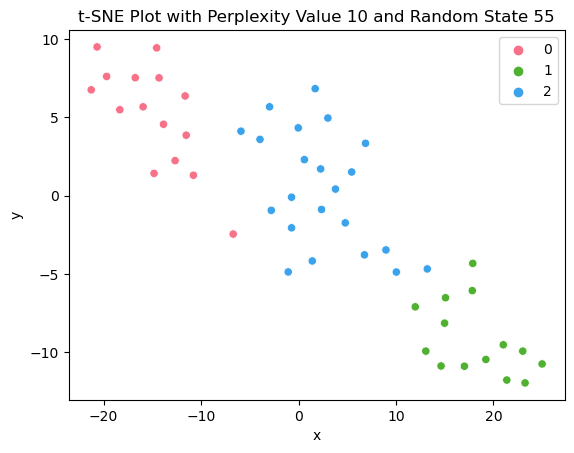

\.\


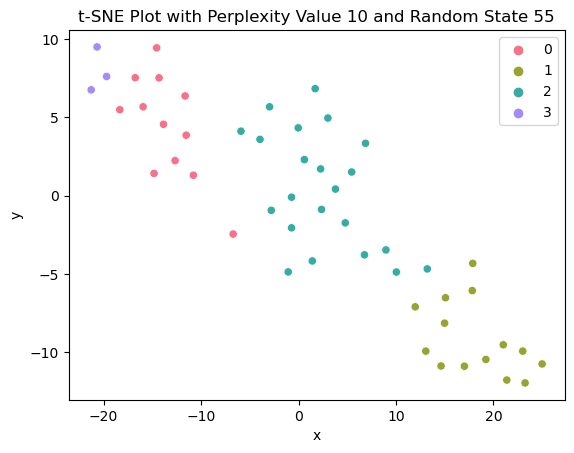

\.\


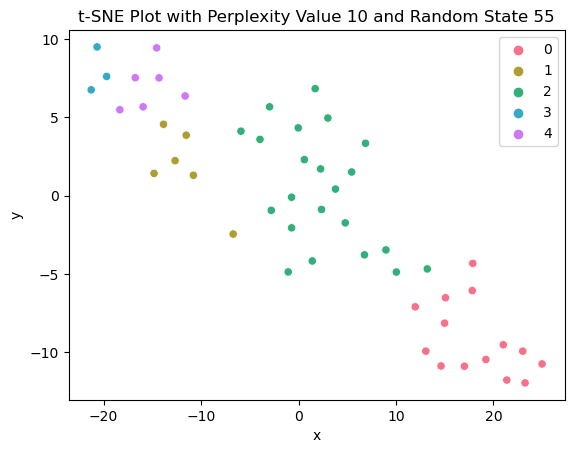

\.\


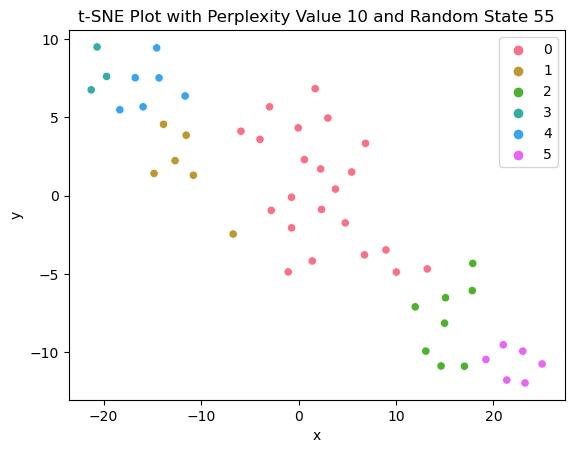

\.\


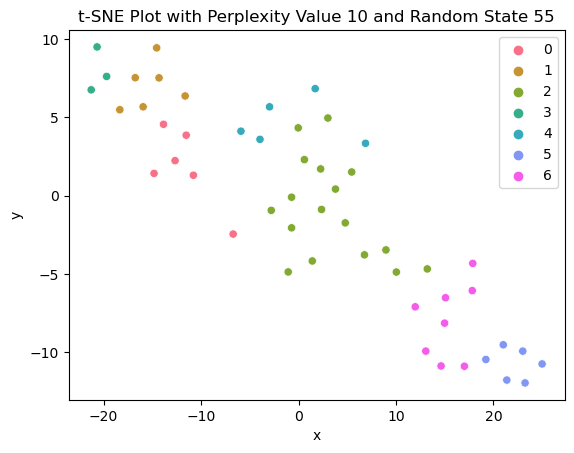

\.\


In [12]:
for k in range(2,8):
    hac = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage = 'complete')
    tsne_data['predicted_cluster'] = hac.fit_predict(df2)
    
    sns.scatterplot(x='x',y='y', hue = 'predicted_cluster',palette=sns.color_palette("husl", k), data=tsne_data)
    plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(10, 55))
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()
    
    print('\\.\\')

## 7. Hierarchical Agglomerative Clustering with Average Linkage

Let's try out hierarchical agglomerative clustering with average linkage.

### 7.1.  Dendrogram

Create a dendrogram using hierarchical agglomerative clustering with average linkage for the dataset. 
* Label the points with the 'State' column.
* Make sure you are able to read the state labels in your dendrogram.

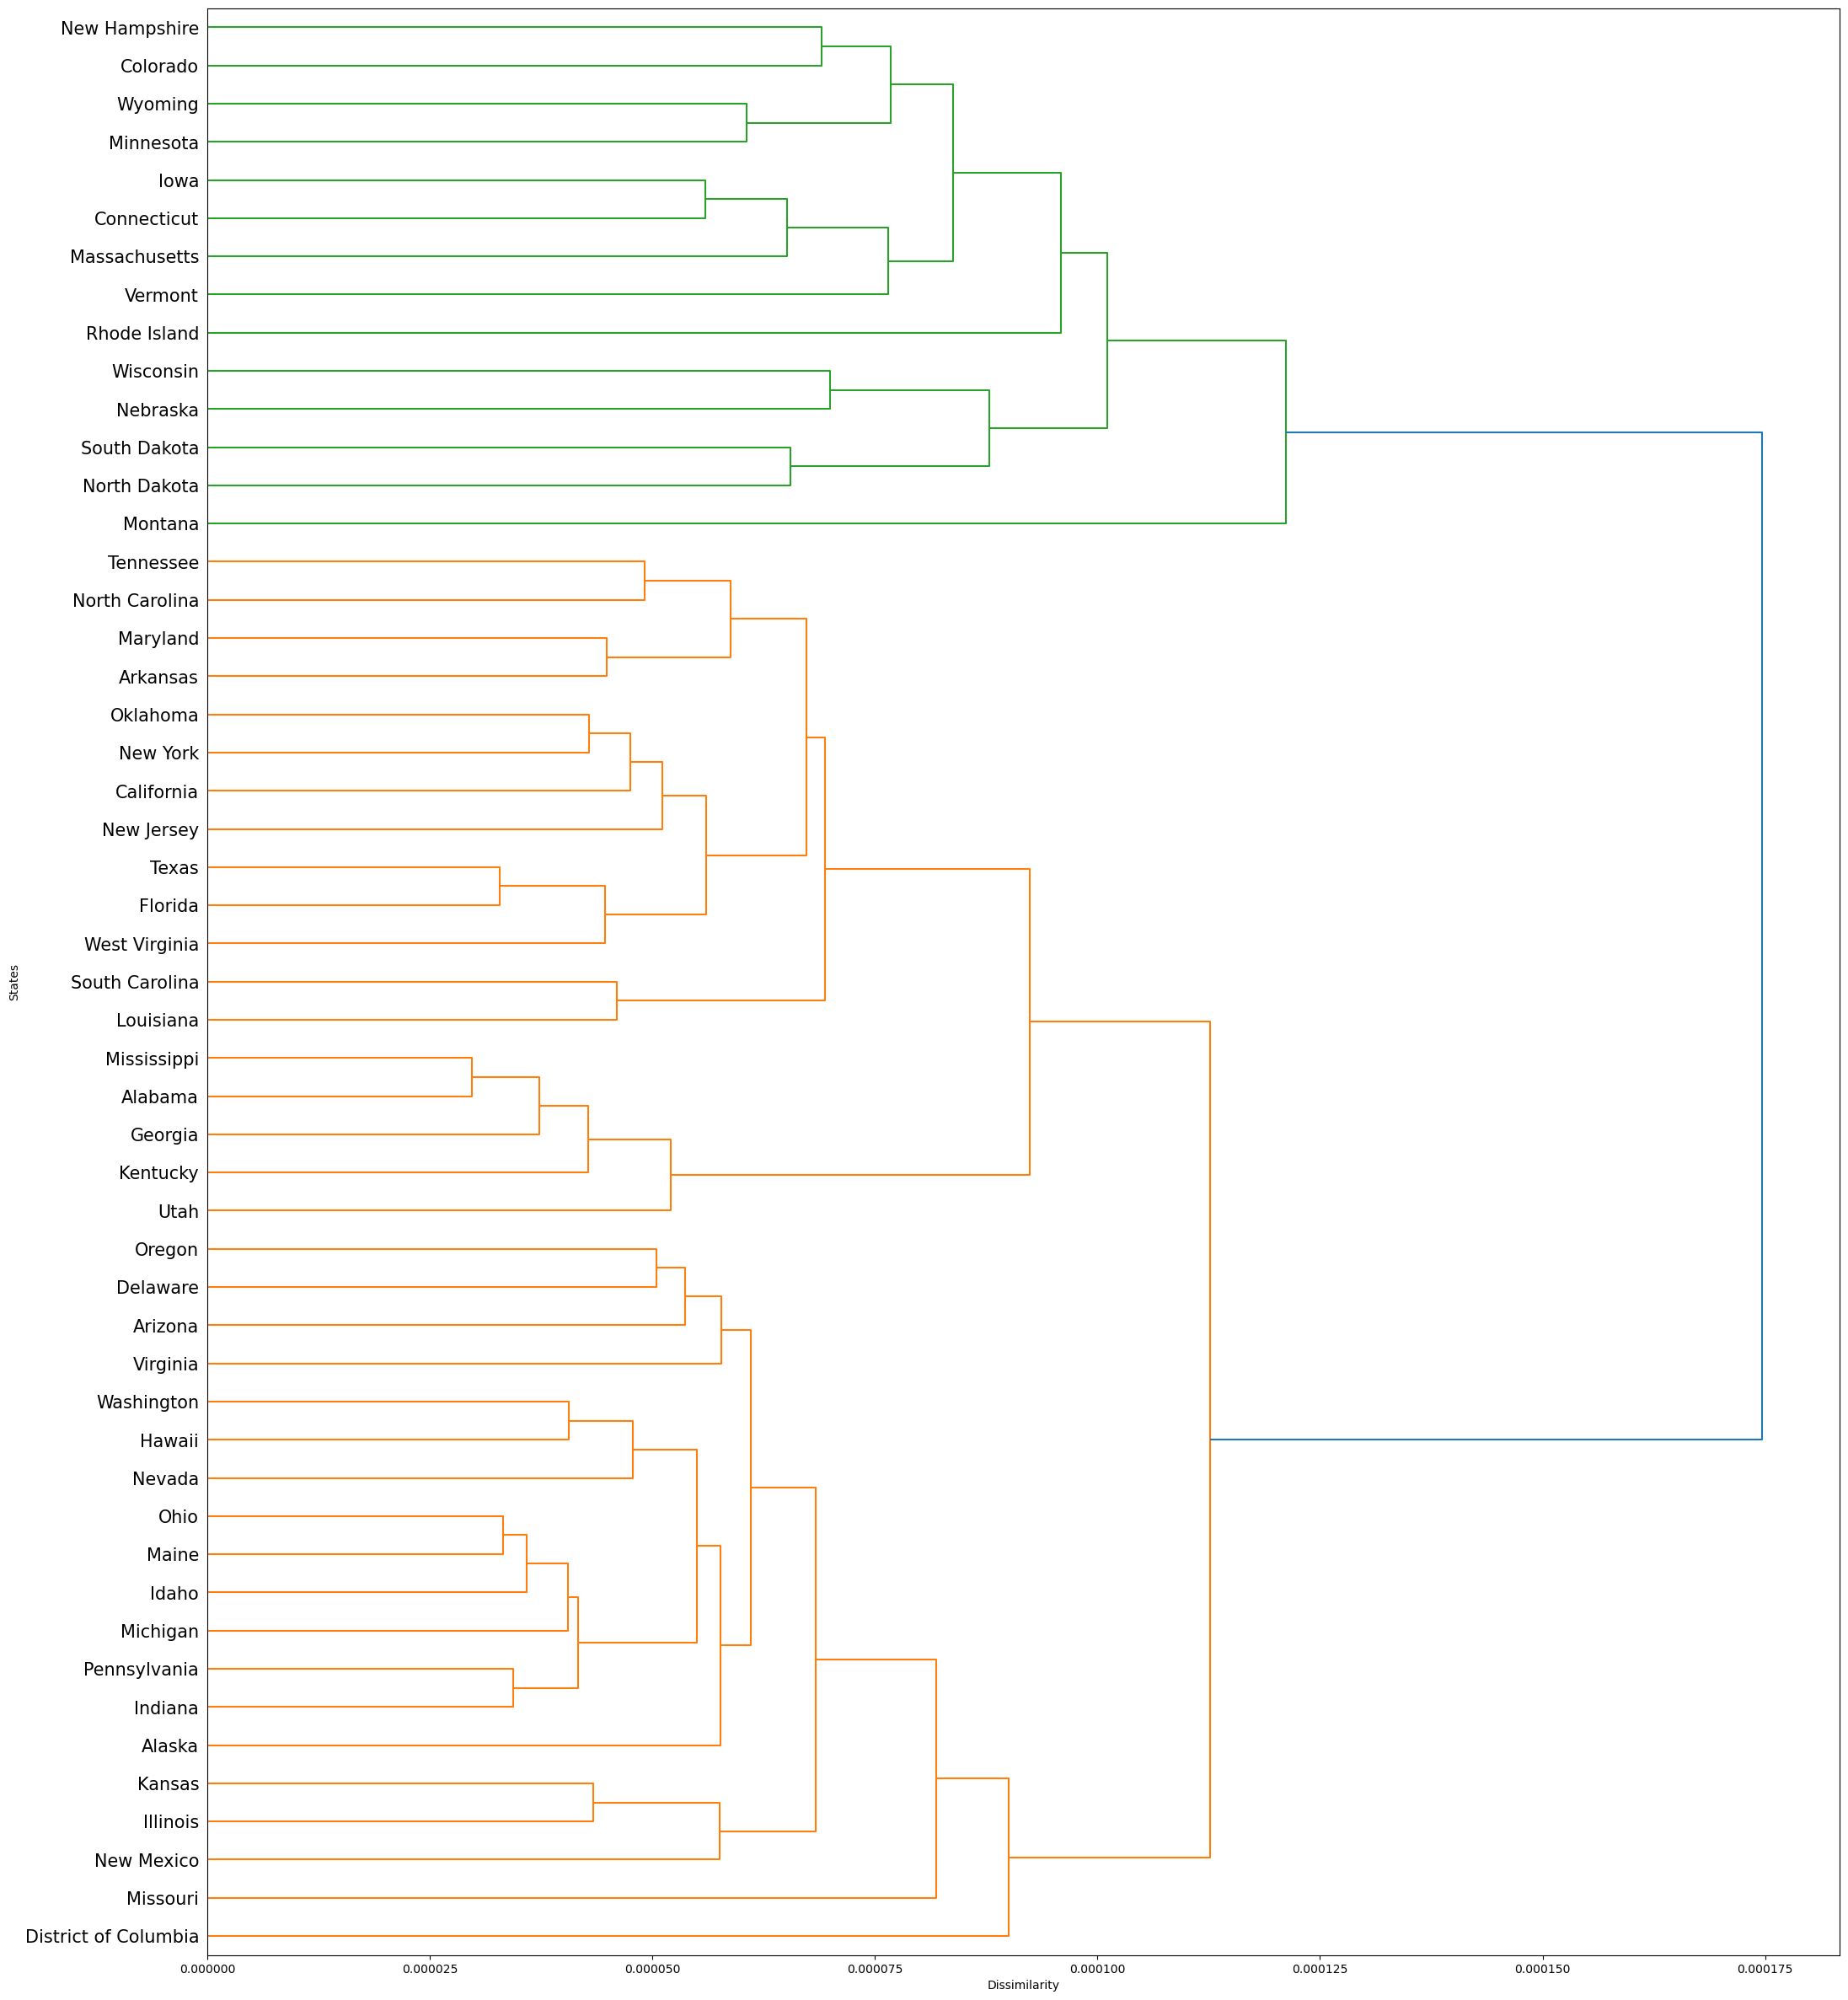

In [13]:
mat = pdist(df2, metric = 'euclidean')
link = linkage(mat, method = 'average')

fig, ax = plt.subplots(figsize = (25,30))
d = dendrogram(link, orientation = 'right', labels = df['State'].array, ax = ax)
ax.set_xlabel('Dissimilarity')
ax.set_ylabel('States')
plt.yticks(fontsize = 15)
plt.show()

### 7.2. t-SNE Individual Clustering Visualization

Then for each of the clusterings with k=2,k=3,...,k=7 clusters, color code the points in your selected t-SNE plot with the respective cluster labels.

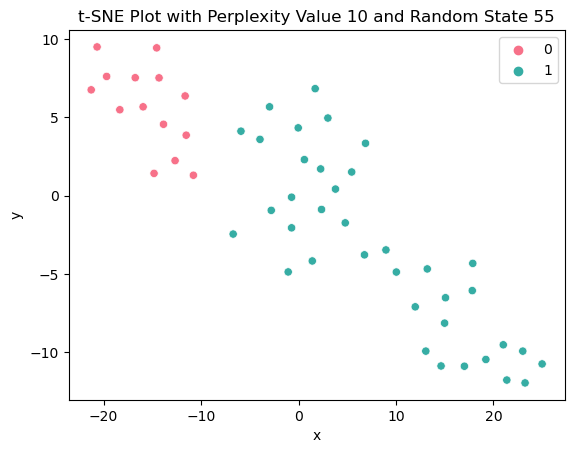

\.\


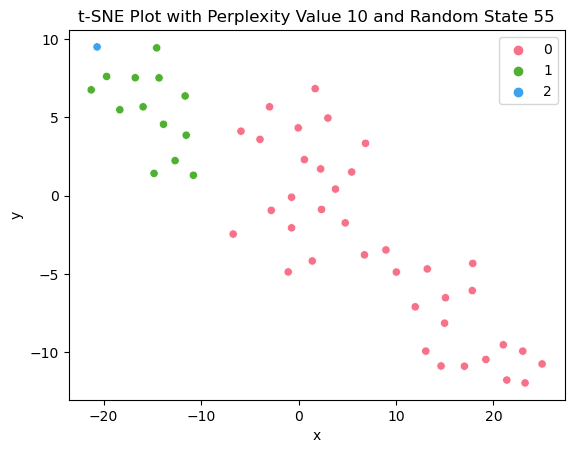

\.\


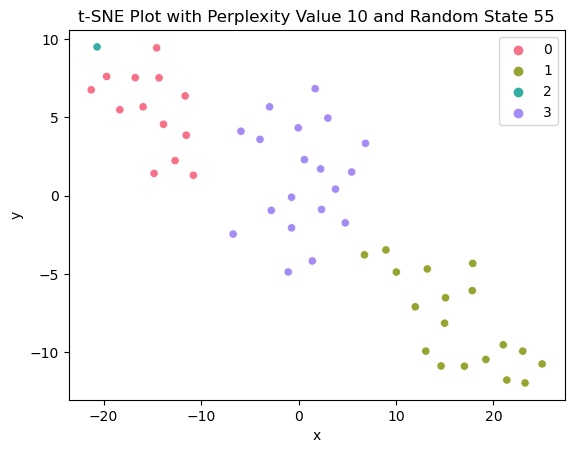

\.\


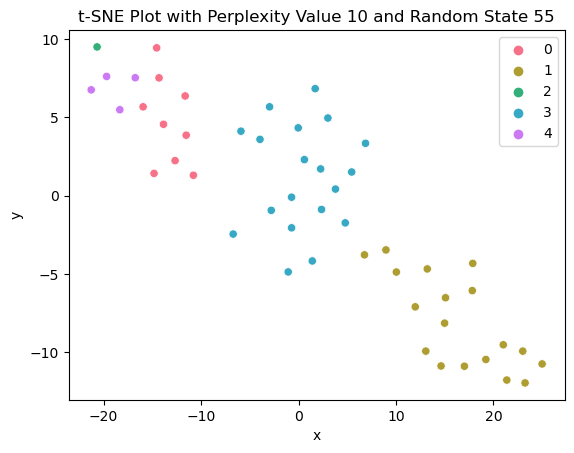

\.\


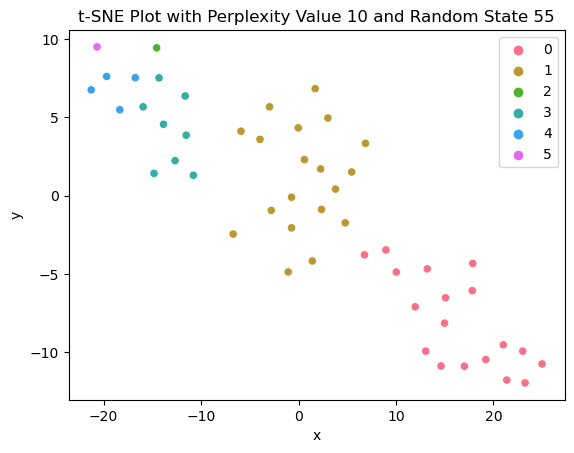

\.\


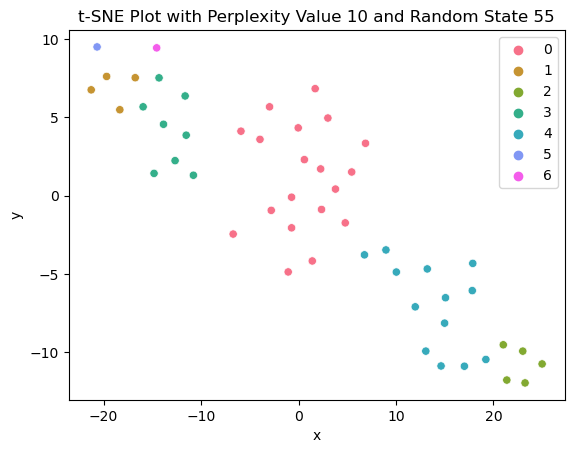

\.\


In [14]:
for k in range(2,8):
    hac = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage = 'average')
    tsne_data['predicted_cluster'] = hac.fit_predict(df2)
    
    sns.scatterplot(x='x',y='y', hue = 'predicted_cluster',palette=sns.color_palette("husl", k), data=tsne_data)
    plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(10, 55))
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()
    
    print('\\.\\')

## 8. Hierarchical Agglomerative Clustering with Ward's Linkage

Let's try out hierarchical agglomerative clustering with Ward's linkage.

### 8.1.  Dendrogram

Create a dendrogram using hierarchical agglomerative clustering with Ward's linkage for the dataset. 
* Label the points with the 'State' column.
* Make sure you are able to read the state labels in your dendrogram.

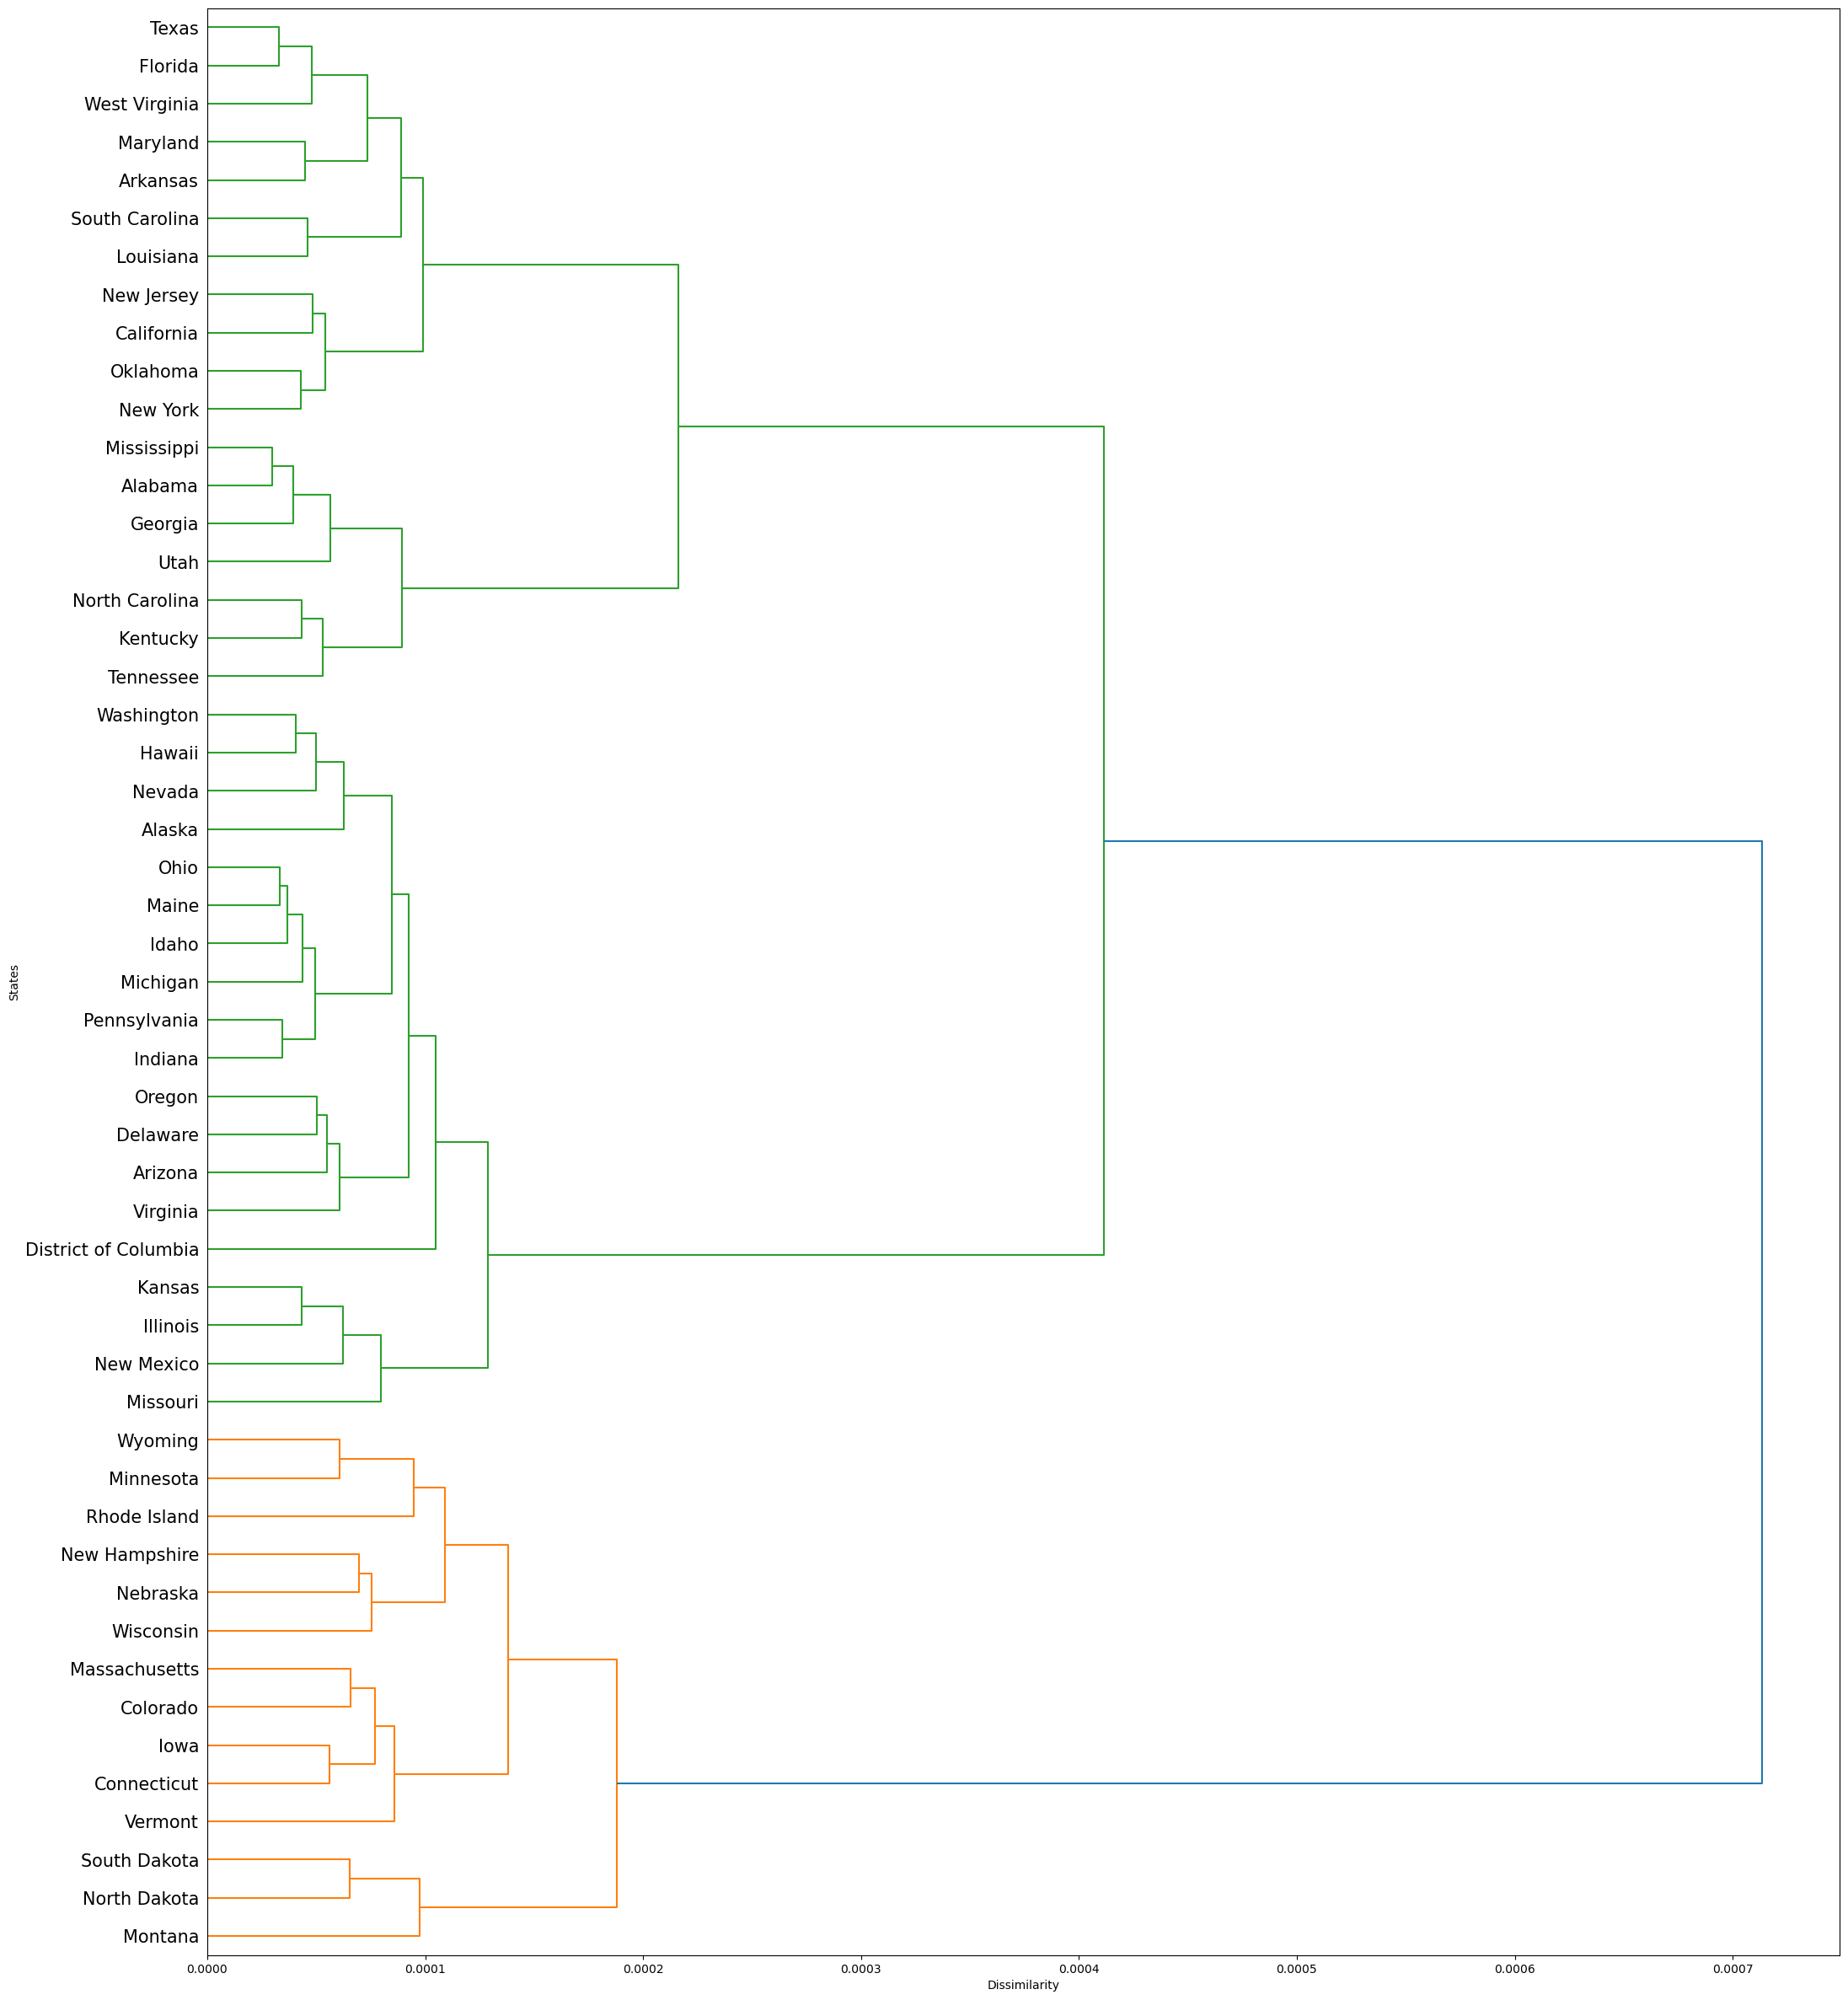

In [15]:
mat = pdist(df2, metric = 'euclidean')
link = linkage(mat, method = 'ward')

fig, ax = plt.subplots(figsize = (25,30))
d = dendrogram(link, orientation = 'right', labels = df['State'].array, ax = ax)
ax.set_xlabel('Dissimilarity')
ax.set_ylabel('States')
plt.yticks(fontsize = 15)
plt.show()

### 8.2. t-SNE Individual Clustering Visualization

Then for each of the clusterings with k=2,k=3,...,k=7 clusters, color code the points in your selected t-SNE plot with the respective cluster labels.

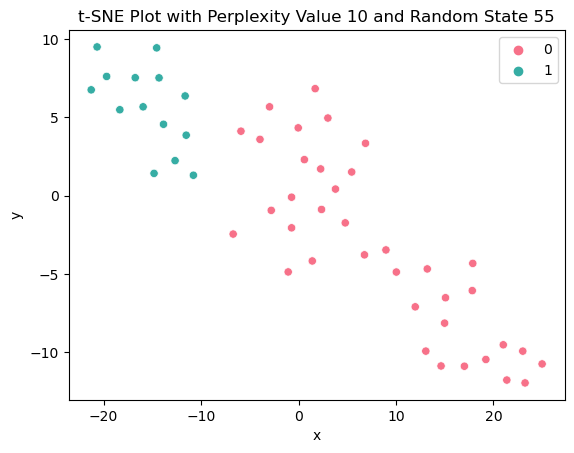

\.\


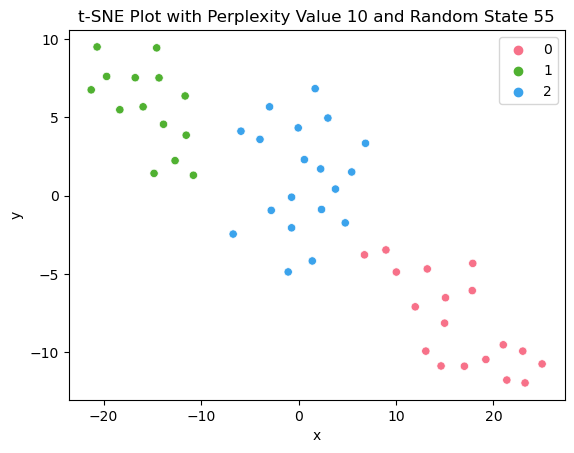

\.\


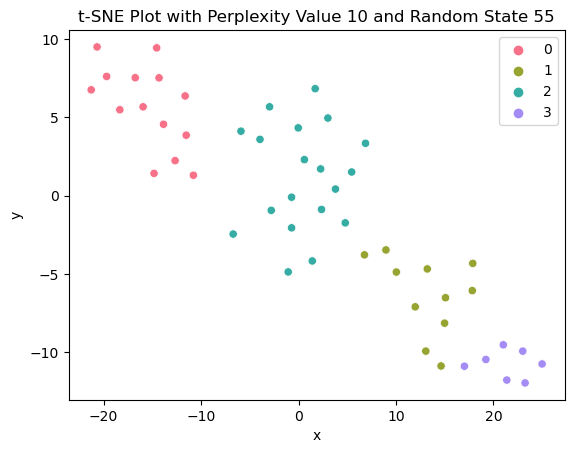

\.\


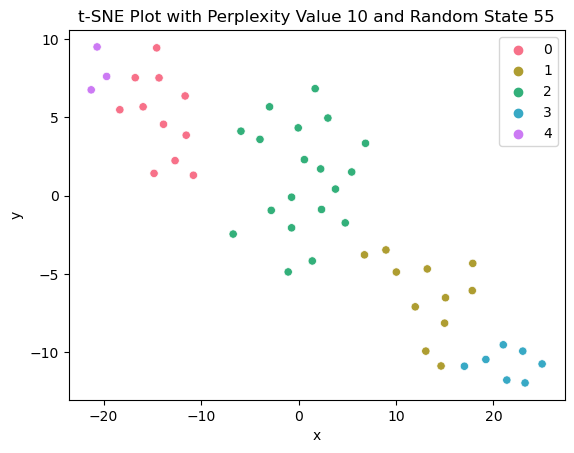

\.\


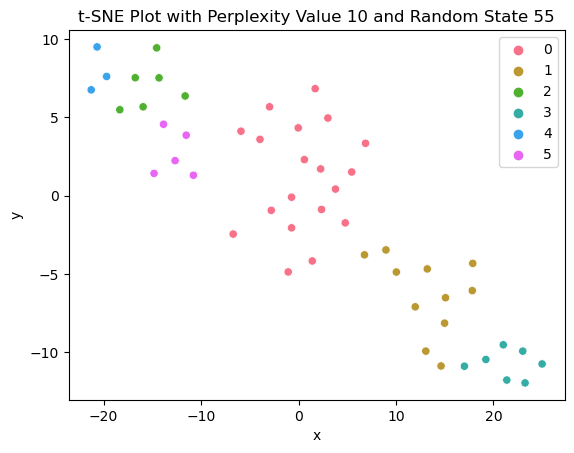

\.\


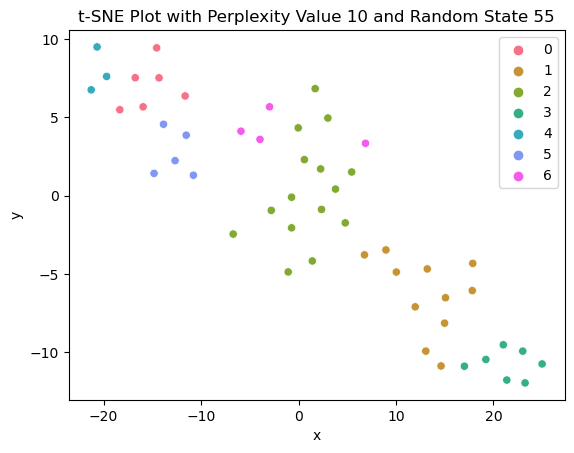

\.\


In [16]:
for k in range(2,8):
    hac = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage = 'ward')
    tsne_data['predicted_cluster'] = hac.fit_predict(df2)
    
    sns.scatterplot(x='x',y='y', hue = 'predicted_cluster',palette=sns.color_palette("husl", k), data=tsne_data)
    plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(10, 55))
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()
    
    print('\\.\\')

## 9. Algorithm Comparison

### 9.1 Worst Performance

If our goal of this cluster analysis was to identify a nested clustering structure of states, in which the clusters were roughly well-balanced in size, which of the four agglomerative hierarchical clustering algorithms performed the worst in this regard? Why?

Single linkage was the one that performed the worst

### 9.2 Illinois Young Adult Alcoholism Patterns

In each of our hierarchical agglomerative clustering algorithms above, which clusters of state(s) did the {Illinois} singleton cluster join with first?

(You can just give the state abbreviation).

Single: Kansas
Complete: Kansas, Virginia, New Mexico, Missouri
Average: Kansas, New Mexico
Ward: Kansas, New Mexico, Missouri

## 10. Post-Cluster Analysis


* <u>Goal 1</u>: Let's choose to examine the hierarchical agglomerative clustering results with the linkage function that yielded a clustering that had the highest observed average silhouette score from 4.1.

* <u>Goal 2</u>: In addition, we'd specifically like to examine the clusterings with k=2 and k=3 clusters created with this linkage function. Ideally we would not like for any of our examined clusterings to pick off any singleton clusters.

In light of our two research goals, which linkage function should we examine?



The ward linkage is the one we should examine

### 10.1. Two Most Distinct Clusters

What distinguishes the two most distinct clusters found by this clustering algorithm (ie. the two clusters that were merged together last)?

In [17]:
hac = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
tsne_data['predicted_cluster'] = hac.fit_predict(df2)

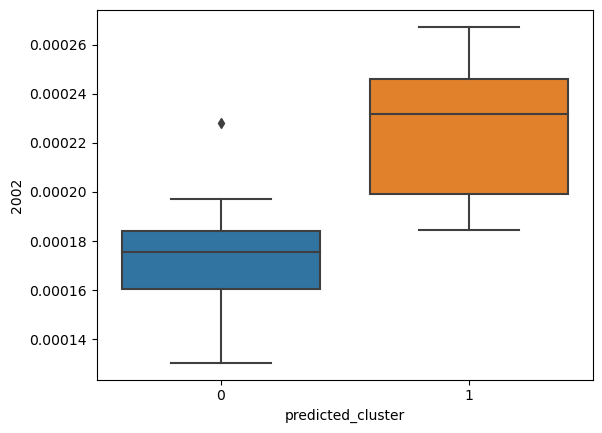

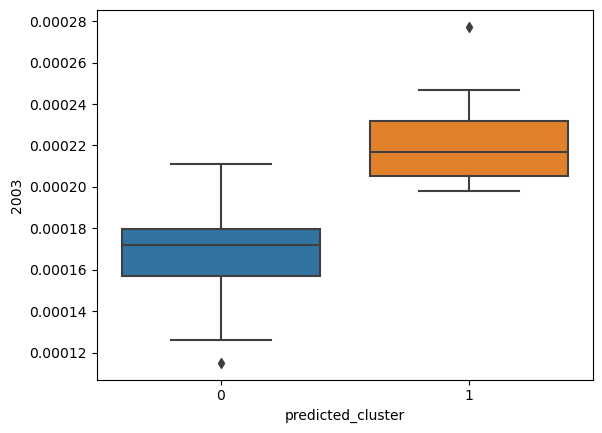

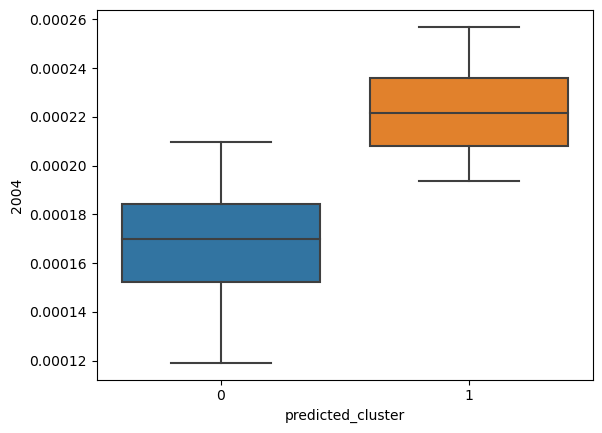

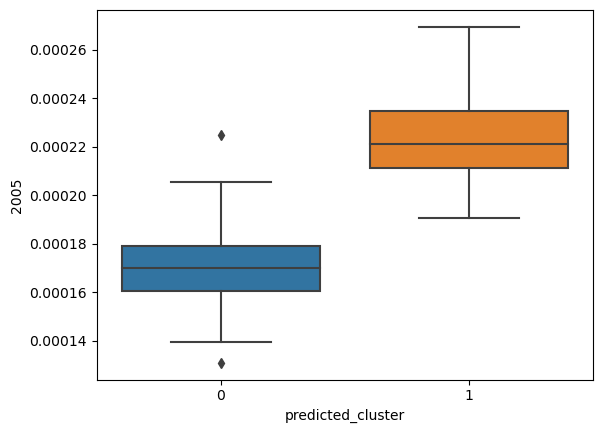

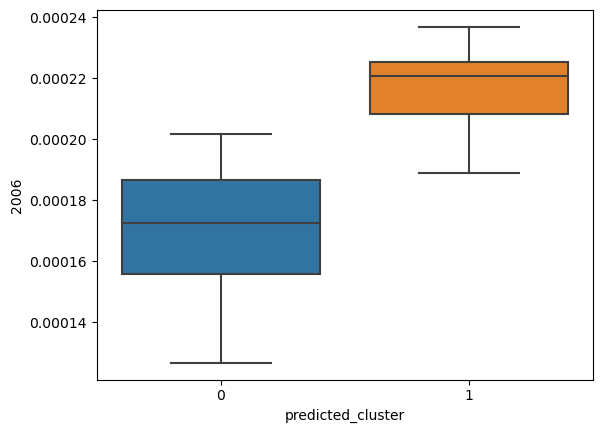

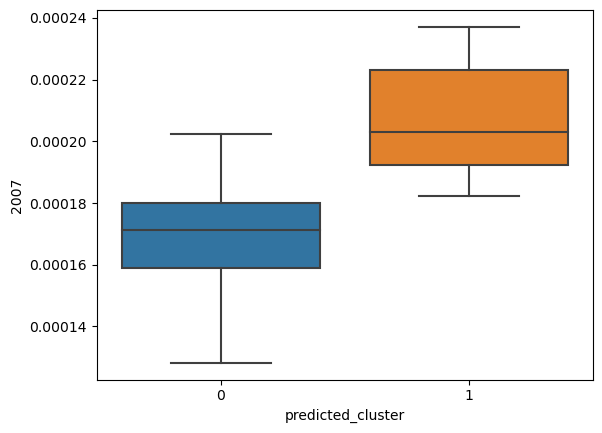

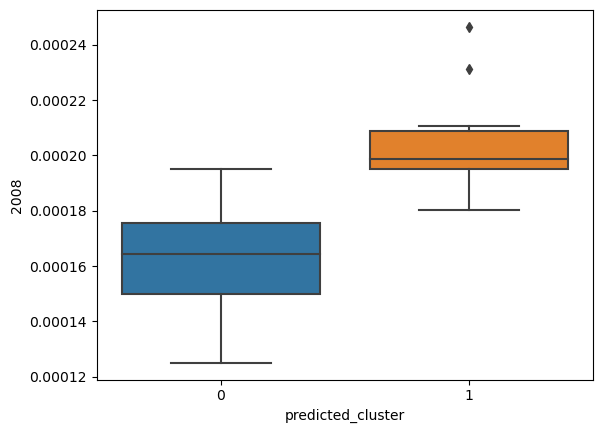

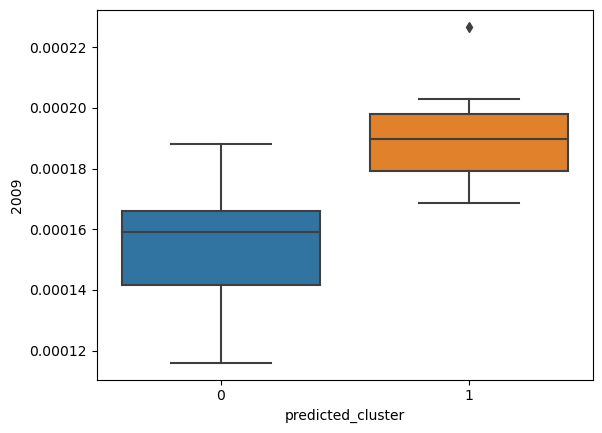

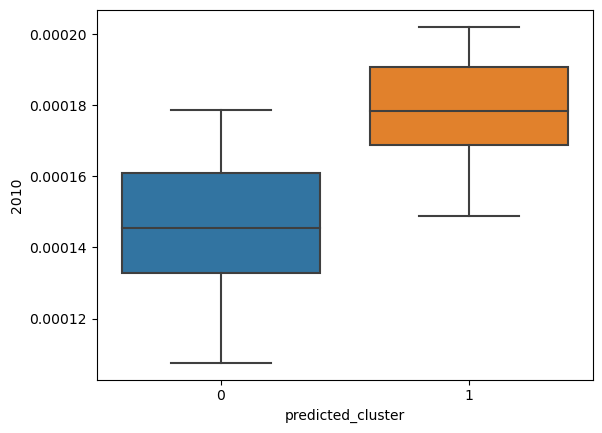

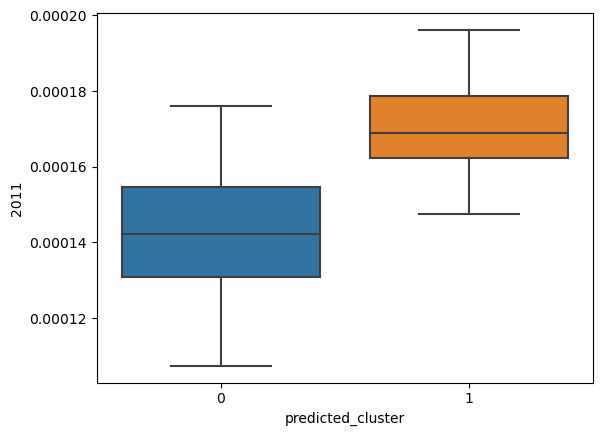

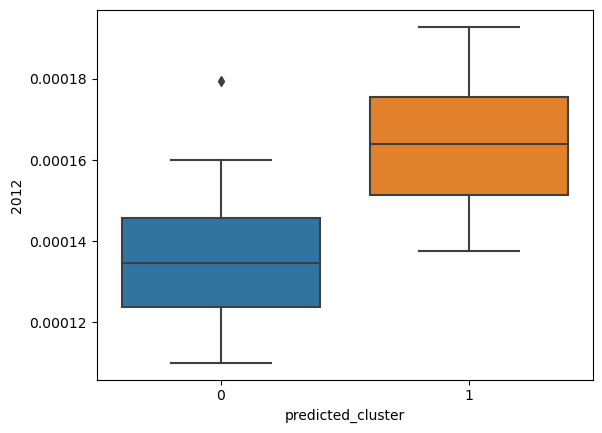

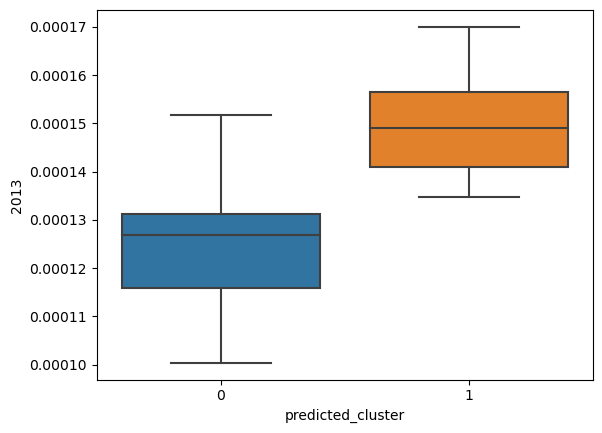

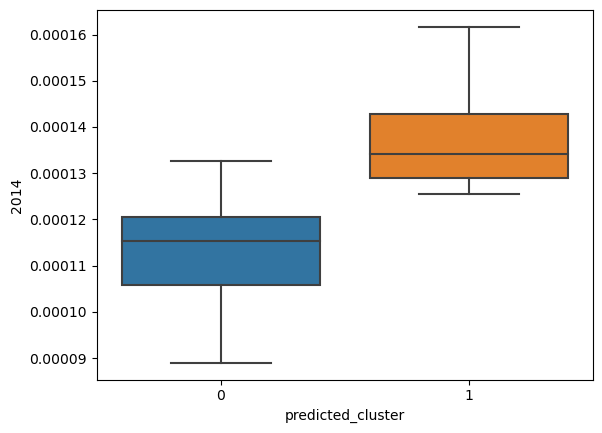

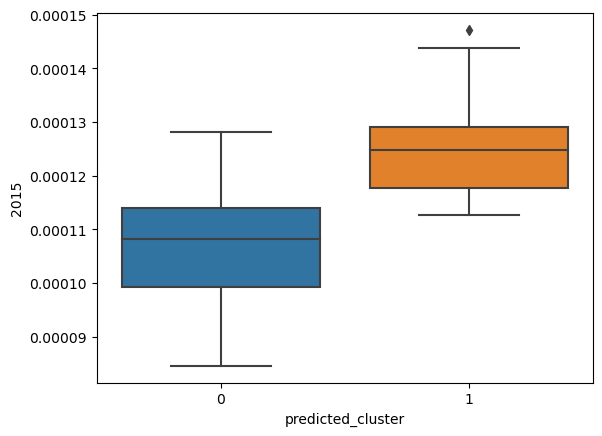

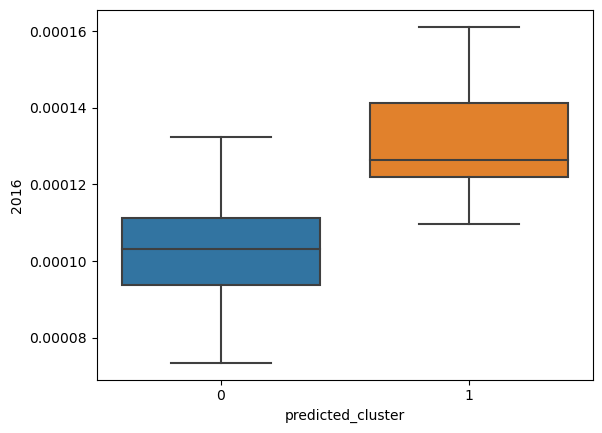

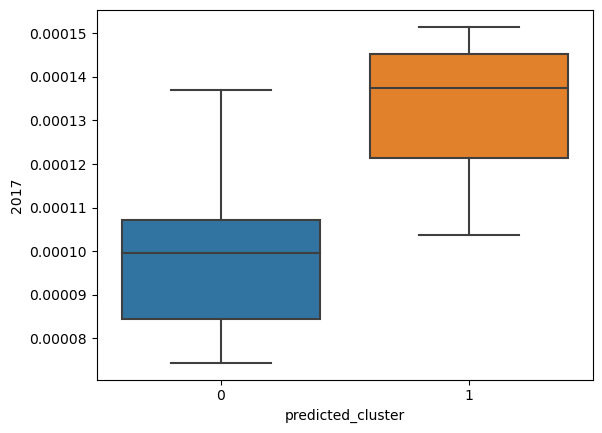

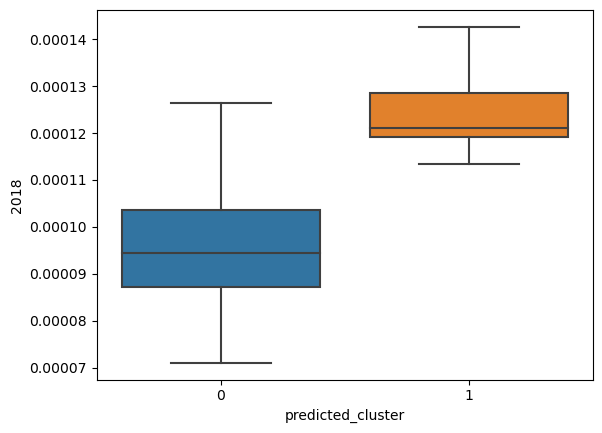

In [18]:
df['predicted_cluster']=tsne_data['predicted_cluster']
for col in df.columns[1:18]:
    sns.boxplot(x="predicted_cluster", y=col, data=df)
    plt.show()

Cluster 2 has a higher prevalence in alcohol use disorders among young adults throughout the years

### 10.2. Two Second Most Distinct Clusters

What distinguishes the two clusters that are the *second most* dissimilar? (ie. the clusters that were merged second to last in the hierarchical agglomerative clustering algorithm)?

In [19]:
hac = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
tsne_data['predicted_cluster'] = hac.fit_predict(df2)

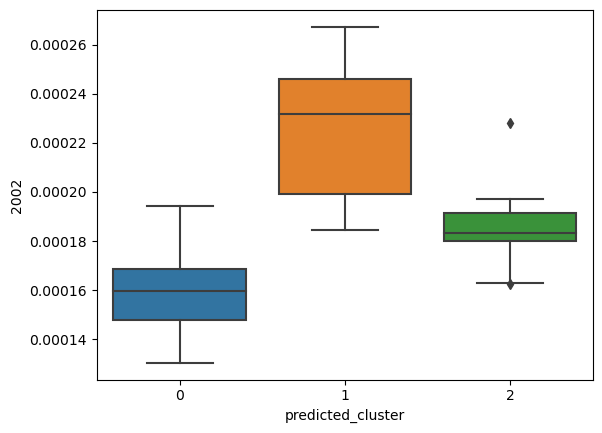

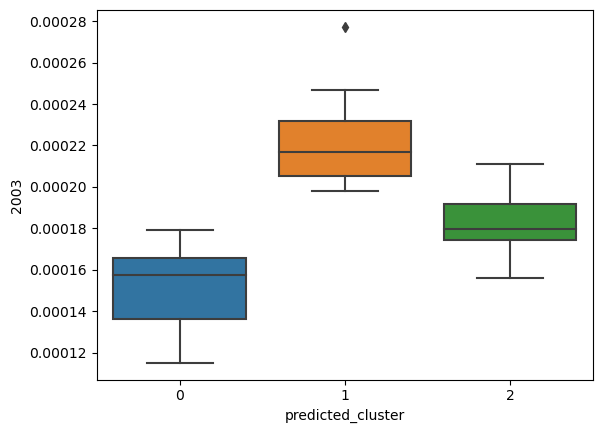

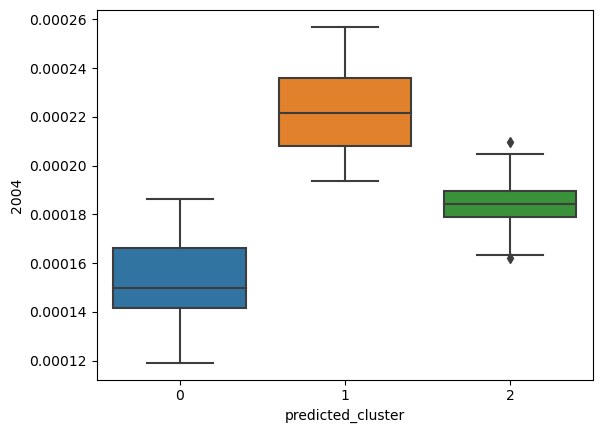

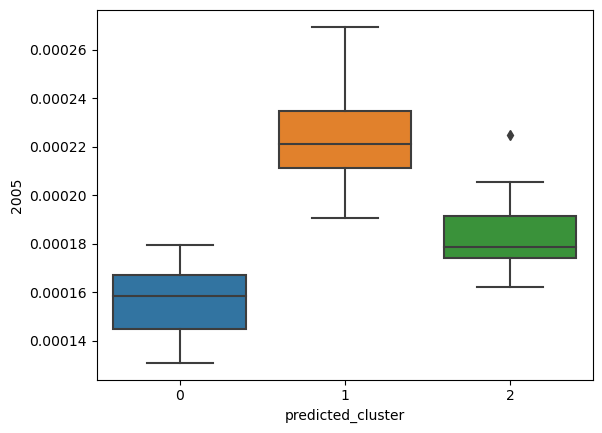

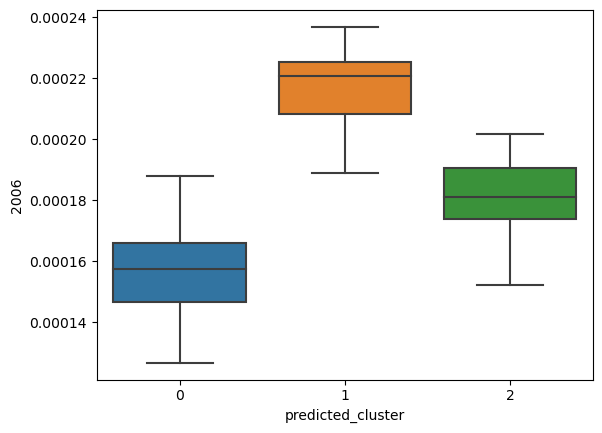

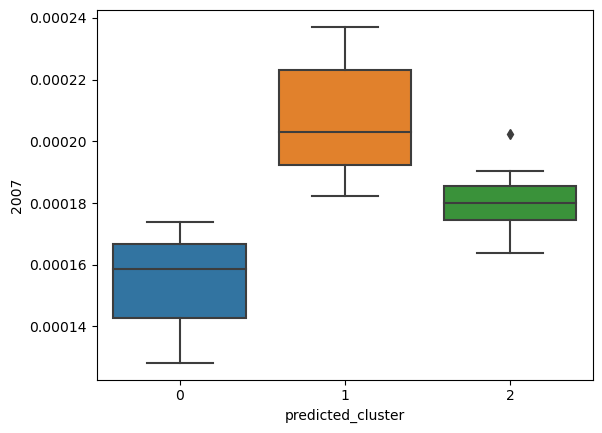

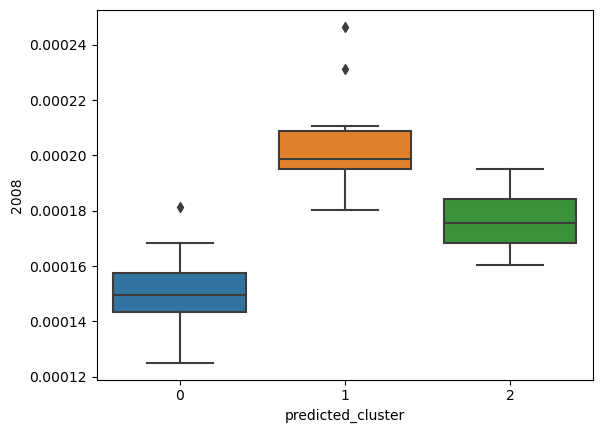

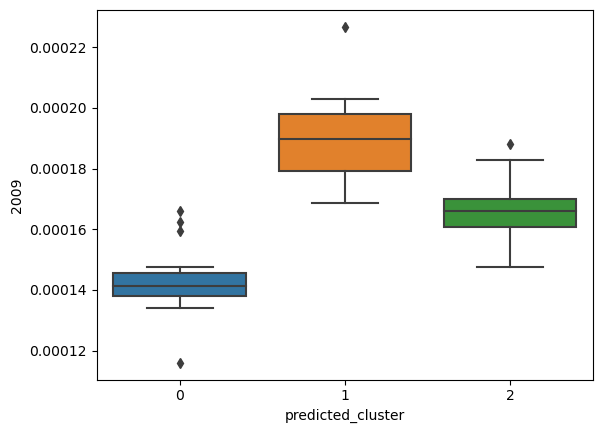

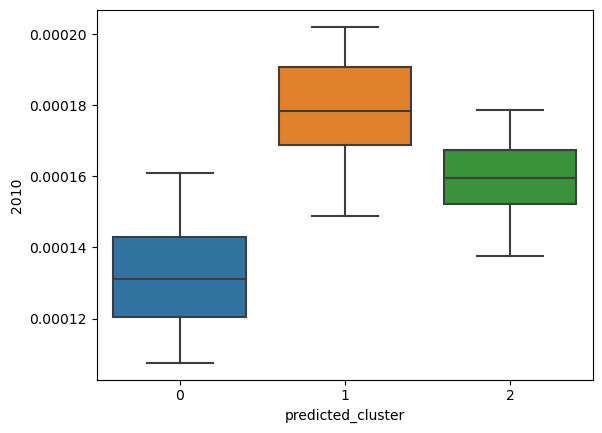

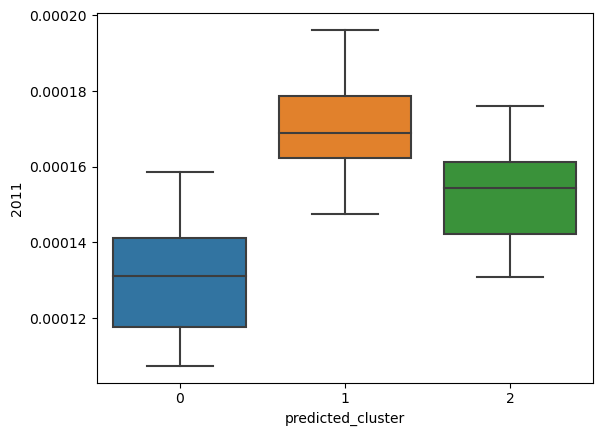

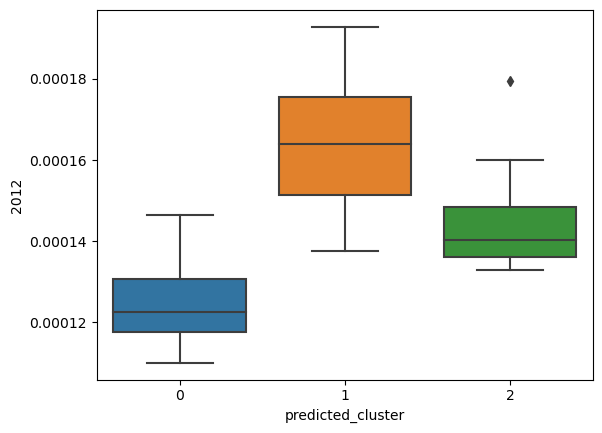

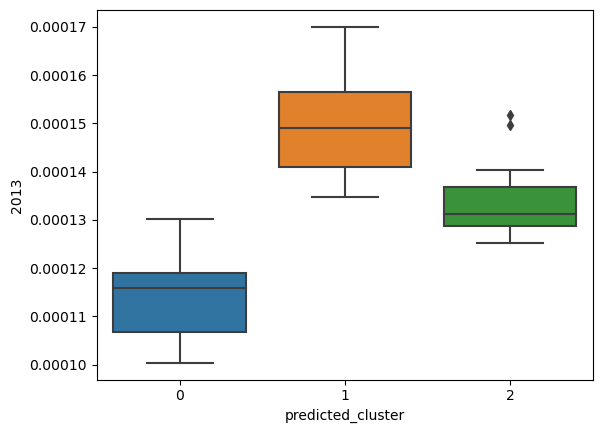

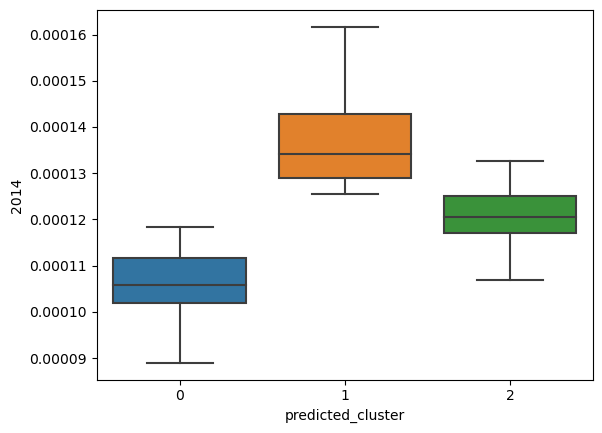

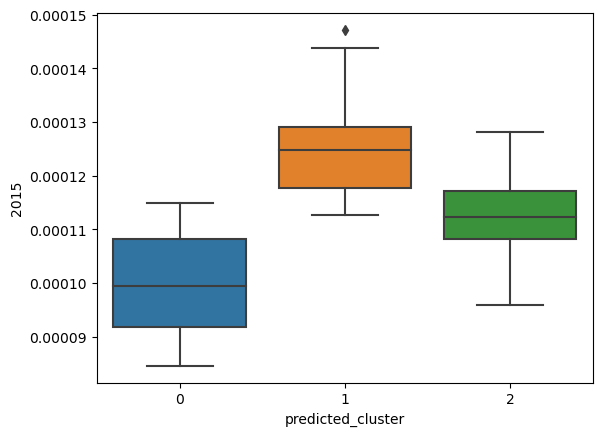

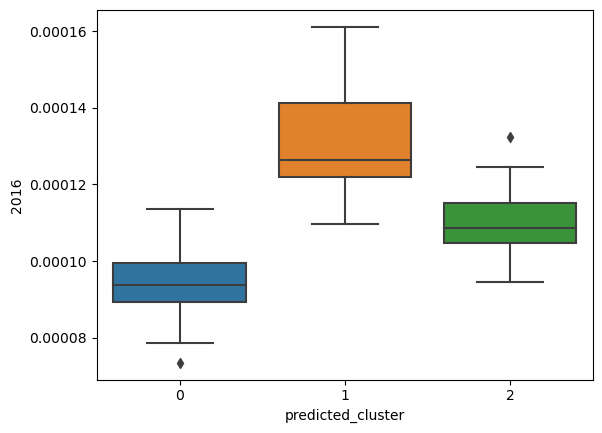

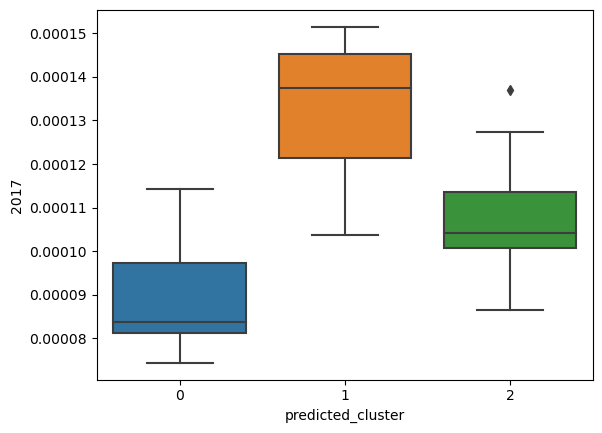

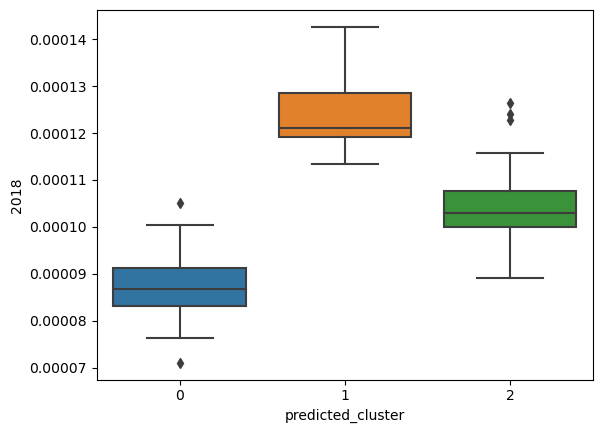

In [20]:
df['predicted_cluster']=tsne_data['predicted_cluster']
for col in df.columns[1:18]:
    sns.boxplot(x="predicted_cluster", y=col, data=df)
    plt.show()


The main similarity between cluster 0 and cluster 2 is that in average, throughout the years they present a smaller prevalence of alcohol disorders in young adults, that's why they group together first instead of grouping with cluster 1